**TASK1: Data Pre-Processing**

In [1]:
import pandas as pd

In [2]:
reg_data =pd.read_excel("/content/21_Fish_market_regression.xlsx")

In [3]:
reg_data

Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]

**Quick Oveview(shape, info, description, several first rows)**

In [4]:
reg_data.shape #shape(number) of regression data (rows, columns)/ rows: instance, columns: variables

(159, 7)

In [5]:
reg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
reg_data.describe()

Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000

In [8]:
reg_data.head(0) # variables

Empty DataFrame
Columns: [Species, Weight, Length1, Length2, Length3, Height, Width]
Index: []

In [9]:
reg_data.head(10) # several first rows of the dataset

Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
5   Bream   450.0     26.8     29.7     34.7  13.6024  4.9274
6   Bream   500.0     26.8     29.7     34.5  14.1795  5.2785
7   Bream   390.0     27.6     30.0     35.0  12.6700  4.6900
8   Bream   450.0     27.6     30.0     35.1  14.0049  4.8438
9   Bream   500.0     28.5     30.7     36.2  14.2266  4.9594

In [10]:
reg_data.dtypes # check data types

Species     object
Weight     float64
Length1    float64
Length2    float64
Length3    float64
Height     float64
Width      float64
dtype: object

In [11]:
reg_data.isnull().sum().sum() # check how many MISSING VALUES each column has

np.int64(0)

**Visualize the data Distribution**


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

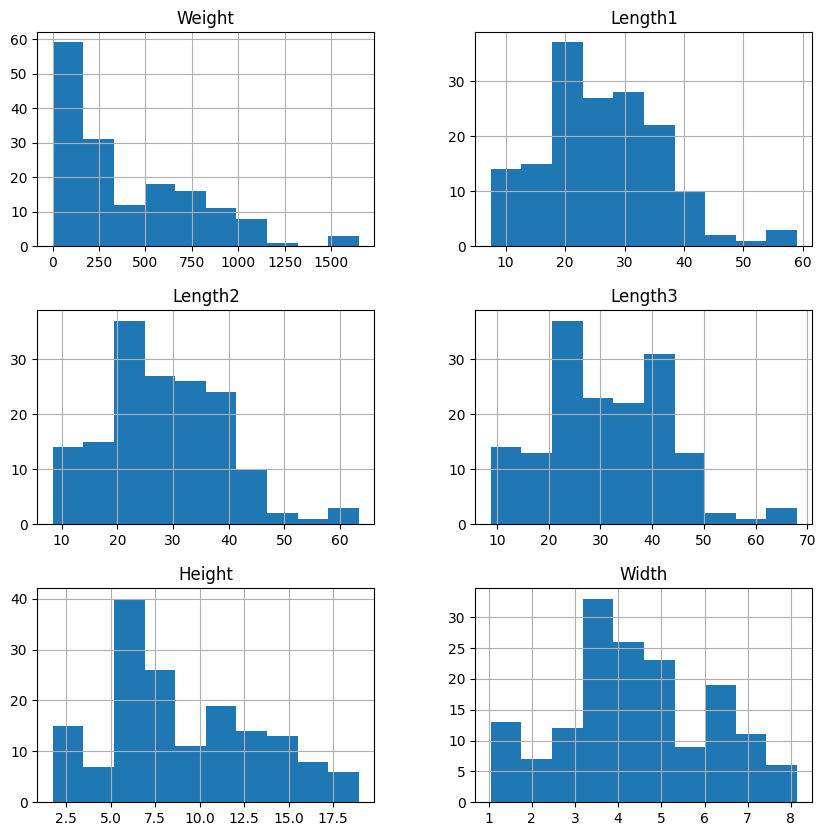

In [13]:
reg_data.hist(figsize=(10,10)) # default binds = 10 / histogram for numerical columns
plt.show()

**Look at the independent and dependent variables. Divide the dataset accordingly into matrices X and Y.
Output the shapes of these matrices.**

*Dependent Variable (Y) = Weight --> The value we want to predict*
*Independent Values (X) = Length1, Length2, Length3, Height,* *Width, Species --> The features used to predict the Weight*

**Split the Dataset into 2 X and Y**

In [17]:
original_data = reg_data # protect the original version

In [14]:
# Independent Variables - Features
X = reg_data[['Height','Length1','Length2','Length3','Width','Species']]

#Dependent variables - Target
Y = reg_data['Weight']

"Independent Variables:" , X

('Independent Variables:',
       Height  Length1  Length2  Length3   Width Species
 0    11.5200     23.2     25.4     30.0  4.0200   Bream
 1    12.4800     24.0     26.3     31.2  4.3056   Bream
 2    12.3778     23.9     26.5     31.1  4.6961   Bream
 3    12.7300     26.3     29.0     33.5  4.4555   Bream
 4    12.4440     26.5     29.0     34.0  5.1340   Bream
 ..       ...      ...      ...      ...     ...     ...
 154   2.0904     11.5     12.2     13.4  1.3936   Smelt
 155   2.4300     11.7     12.4     13.5  1.2690   Smelt
 156   2.2770     12.1     13.0     13.8  1.2558   Smelt
 157   2.8728     13.2     14.3     15.2  2.0672   Smelt
 158   2.9322     13.8     15.0     16.2  1.8792   Smelt
 
 [159 rows x 6 columns])

In [15]:
"Dependent Variables:" ,Y

('Dependent Variables:',
 0      242.0
 1      290.0
 2      340.0
 3      363.0
 4      430.0
        ...  
 154     12.2
 155     13.4
 156     12.2
 157     19.7
 158     19.9
 Name: Weight, Length: 159, dtype: float64)

*Species* column is categorical. Hence, It must be encoded before regression because Regression model works only with numerical variable.
*If we look at the dtype output we can see the type of Species variable*

In [16]:
reg_data["Species"].unique() #Check again the Species column

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [19]:
suitability_report = {}
for column in reg_data.columns:
    # Temel istatistikler
    n_unique = reg_data[column].nunique()
    n_missing = reg_data[column].isnull().sum()
    data_type = reg_data[column].dtype

    # Uygunluk kriterleri
    issues = []

    if n_missing > 0:
        issues.append(f"{n_missing} missing value")

    if n_unique <= 1:
        issues.append("no stable value - variance ")

    # 3. Çok yüksek kardinalite (sadece kategorikler için)
    if data_type == 'object' and n_unique > 50:
        issues.append(f"({n_unique} unique value)")

    # 4. Benzersiz değer kontrolü (ID gibi)
    if n_unique == len(reg_data):
        issues.append("unique identifier (such as ID)")

    suitability_report[column] = {
        'data_type': data_type,
        'n_unique': n_unique,
        'n_missing': n_missing,
        'issues': issues,
        'suitable': len(issues) == 0
    }

In [20]:
print("=== Variable Report Whether Suitable or Not  ===")
for col, info in suitability_report.items():
    status = " Fit " if info['suitable'] else " Not-fit "
    print(f"{col}: {status}")
    print(f"  - Typ: {info['data_type']}, Unique: {info['n_unique']}, missing: {info['n_missing']}")
    if info['issues']:
        print(f"  - Issue: {', '.join(info['issues'])}")
    print()

=== Variable Report Whether Suitable or Not  ===
Species:  Fit 
  - Typ: object, Unique: 7, missing: 0

Weight:  Fit 
  - Typ: float64, Unique: 101, missing: 0

Length1:  Fit 
  - Typ: float64, Unique: 116, missing: 0

Length2:  Fit 
  - Typ: float64, Unique: 93, missing: 0

Length3:  Fit 
  - Typ: float64, Unique: 124, missing: 0

Height:  Fit 
  - Typ: float64, Unique: 154, missing: 0

Width:  Fit 
  - Typ: float64, Unique: 152, missing: 0



*One-Hot Encoding and Label Encoding* are two common encoding methods. While the One-Hot is recommended for Regressin, the Label Encoding is not.

In [21]:
X_Encoded = pd.get_dummies(reg_data[['Height','Length1','Length2','Length3','Width','Species']],
                           drop_first=True) # drop_first avoids the multicollinearity


In [22]:
X_Encoded.head(0)

Empty DataFrame
Columns: [Height, Length1, Length2, Length3, Width, Species_Parkki, Species_Perch, Species_Pike, Species_Roach, Species_Smelt, Species_Whitefish]
Index: []

In [23]:
X_Encoded.shape

(159, 11)

Moment, The X is full numeric (After encoding)

In [25]:
X_Encoded.isnull().sum().sum()

np.int64(0)

In [ ]:
df_filled_median = reg_data.fillna(reg_data.median(numeric_only=True))
df_filled_mean = reg_data.fillna(reg_data.mean(numeric_only=True))

In [ ]:
print(df_filled_mean.isnull().sum())

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


In [28]:
reg_data[X.columns] = reg_data[X.columns].fillna(reg_data[X.columns].median(numeric_only=True)) # fill the NaN values with mean()

Check the dependences between each of the independent variable and the target variable and among
the independent variables. Output correlation table and corresponding heatmap results.

In [30]:
df_corr = pd.concat([X_Encoded, Y], axis=1)
df_corr

Height  Length1  Length2  Length3   Width  Species_Parkki  \
0    11.5200     23.2     25.4     30.0  4.0200           False   
1    12.4800     24.0     26.3     31.2  4.3056           False   
2    12.3778     23.9     26.5     31.1  4.6961           False   
3    12.7300     26.3     29.0     33.5  4.4555           False   
4    12.4440     26.5     29.0     34.0  5.1340           False   
..       ...      ...      ...      ...     ...             ...   
154   2.0904     11.5     12.2     13.4  1.3936           False   
155   2.4300     11.7     12.4     13.5  1.2690           False   
156   2.2770     12.1     13.0     13.8  1.2558           False   
157   2.8728     13.2     14.3     15.2  2.0672           False   
158   2.9322     13.8     15.0     16.2  1.8792           False   

     Species_Perch  Species_Pike  Species_Roach  Species_Smelt  \
0            False         False          False          False   
1            False         False          False          False   
2            False         False          False          False   
3            False         False          False          False   
4            False         False          False          False   
..             ...           ...            ...            ...   
154          False         False          False           True   
155          False         False          False           True   
156          False         False          False           True   
157          False         False          False           True   
158          False         False          False           True   

     Species_Whitefish  Weight  
0                False   242.0  
1                False   290.0  
2                False   340.0  
3                False   363.0  
4                False   430.0  
..                 ...     ...  
154              False    12.2  
155              False    13.4  
156              False    12.2  
157              False    19.7  
158              False    19.9  

[159 rows x 12 columns]

In [31]:
corr_matrix = df_corr.corr() # compute correlation matrix
corr_matrix

Height   Length1   Length2   Length3     Width  \
Height             1.000000  0.625378  0.640441  0.703409  0.792881   
Length1            0.625378  1.000000  0.999517  0.992031  0.867050   
Length2            0.640441  0.999517  1.000000  0.994103  0.873547   
Length3            0.703409  0.992031  0.994103  1.000000  0.878520   
Width              0.792881  0.867050  0.873547  0.878520  1.000000   
Species_Parkki    -0.000547 -0.205732 -0.205957 -0.198718 -0.194147   
Species_Perch     -0.191405 -0.037845 -0.036090 -0.105478  0.144021   
Species_Pike      -0.101810  0.563514  0.552780  0.522894  0.137722   
Species_Roach     -0.202076 -0.213250 -0.218048 -0.205072 -0.171465   
Species_Smelt     -0.491731 -0.467420 -0.479775 -0.488397 -0.569018   
Species_Whitefish  0.048951  0.050731  0.053777  0.052864  0.124388   
Weight             0.724345  0.915712  0.918618  0.923044  0.886507   

                   Species_Parkki  Species_Perch  Species_Pike  Species_Roach  \
Height                  -0.000547      -0.191405     -0.101810      -0.202076   
Length1                 -0.205732      -0.037845      0.563514      -0.213250   
Length2                 -0.205957      -0.036090      0.552780      -0.218048   
Length3                 -0.198718      -0.105478      0.522894      -0.205072   
Width                   -0.194147       0.144021      0.137722      -0.171465   
Species_Parkki           1.000000      -0.201021     -0.094329      -0.103413   
Species_Perch           -0.201021       1.000000     -0.255127      -0.279694   
Species_Pike            -0.094329      -0.255127      1.000000      -0.131247   
Species_Roach           -0.103413      -0.279694     -0.131247       1.000000   
Species_Smelt           -0.084712      -0.229116     -0.107513      -0.117866   
Species_Whitefish       -0.053988      -0.146018     -0.068519      -0.075117   
Weight                  -0.186034      -0.033240      0.310641      -0.261784   

                   Species_Smelt  Species_Whitefish    Weight  
Height                 -0.491731           0.048951  0.724345  
Length1                -0.467420           0.050731  0.915712  
Length2                -0.479775           0.053777  0.918618  
Length3                -0.488397           0.052864  0.923044  
Width                  -0.569018           0.124388  0.886507  
Species_Parkki         -0.084712          -0.053988 -0.186034  
Species_Perch          -0.229116          -0.146018 -0.033240  
Species_Pike           -0.107513          -0.068519  0.310641  
Species_Roach          -0.117866          -0.075117 -0.261784  
Species_Smelt           1.000000          -0.061533 -0.337109  
Species_Whitefish      -0.061533           1.000000  0.073625  
Weight                 -0.337109           0.073625  1.000000

In [32]:
corr_matrix_with_target = corr_matrix[Y.name].sort_values(ascending=False) # correlation with target
corr_matrix_with_target

Weight               1.000000
Length3              0.923044
Length2              0.918618
Length1              0.915712
Width                0.886507
Height               0.724345
Species_Pike         0.310641
Species_Whitefish    0.073625
Species_Perch       -0.033240
Species_Parkki      -0.186034
Species_Roach       -0.261784
Species_Smelt       -0.337109
Name: Weight, dtype: float64

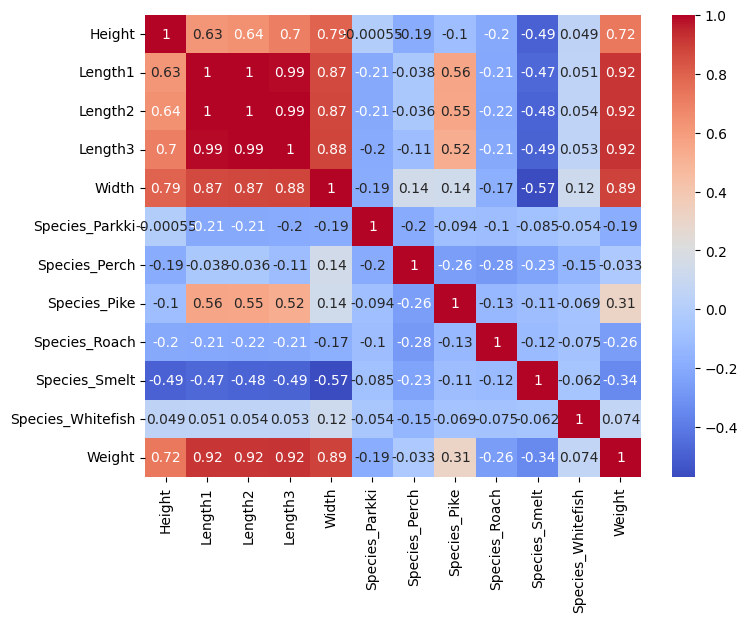

In [33]:
#Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

Build 2D plots of dependences between each pair of the variables. Which conclusion can you make?

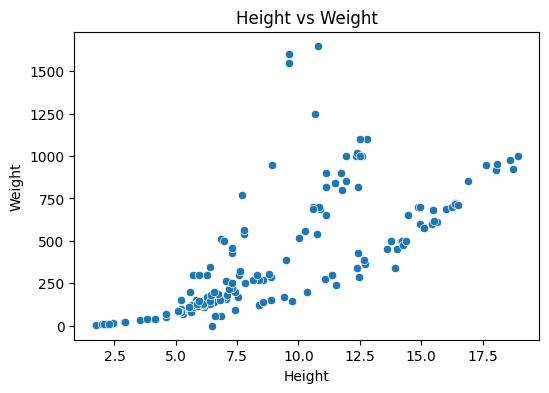

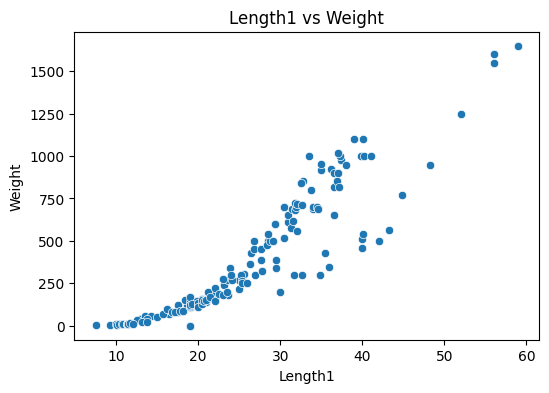

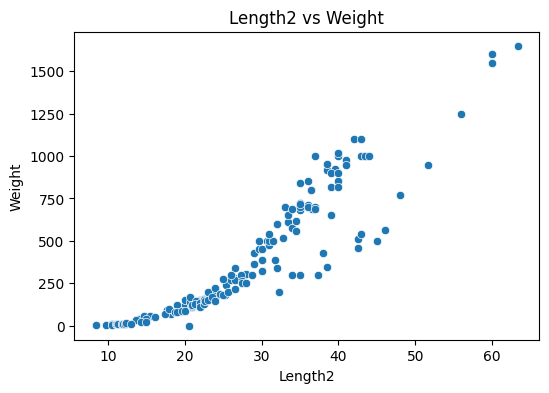

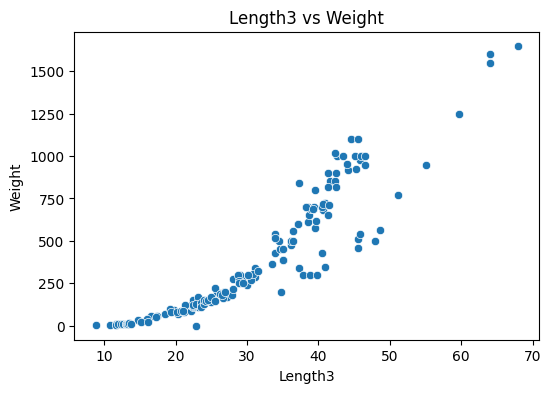

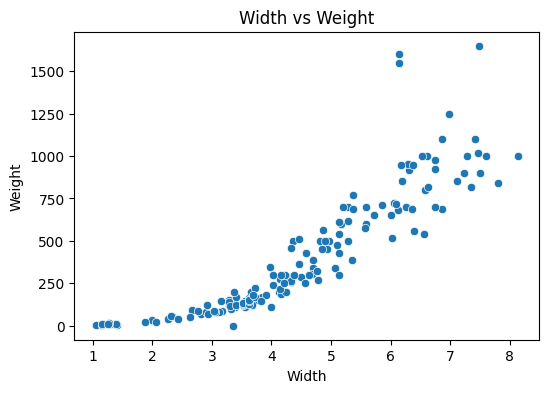

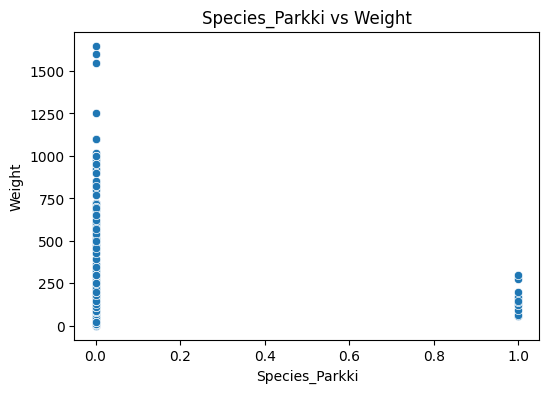

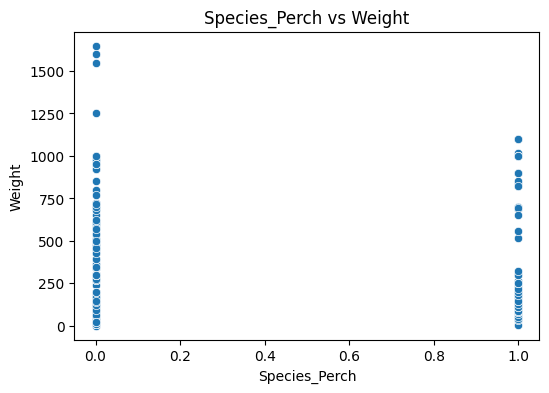

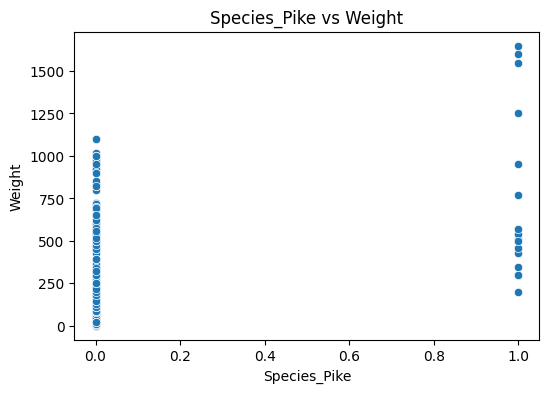

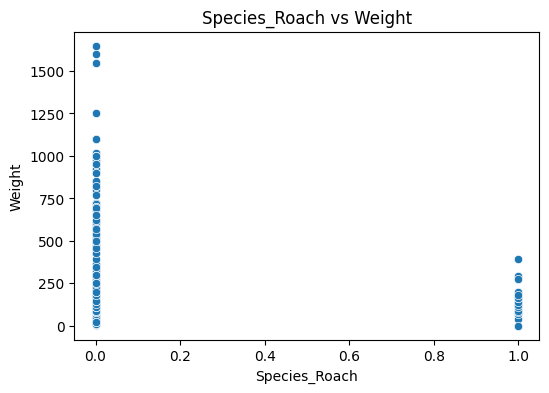

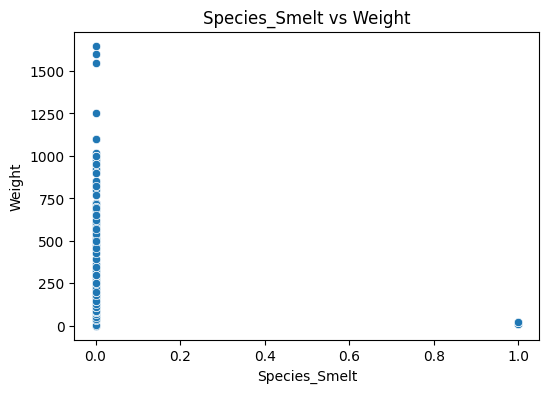

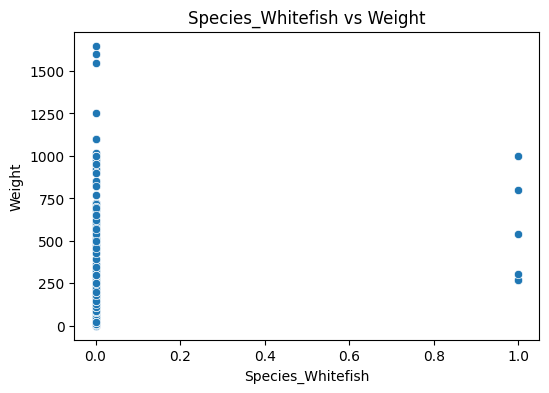

In [34]:
df_plot = pd.concat([X_Encoded, Y], axis=1)

#Scatter plot is the standart way to see the linear(or non linear) relationship with the target
for col in X_Encoded.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=col, y=Y.name, data=df_plot)
    plt.title(f'{col} vs {Y.name}')
    plt.show()

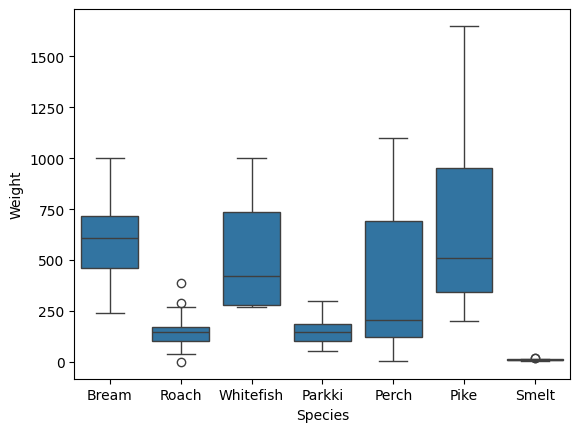

In [35]:
# Categorical features -- Outliars
sns.boxplot(x="Species", y=Y.name, data = reg_data)
plt.show()

In [ ]:
"""
for the Conclusions, I have to answer this question !!!

From these plots, you can usually conclude:

Which variables increase/decrease the target

Which variables may have linear relationships (good for linear regression)

Which variables have nonlinear relationships (may need transformation)

Presence of outliers

Potential multicollinearity if some features strongly correlate with each other
"""

'\nfor the Conclusions, I have to answer this question !!!\n\nFrom these plots, you can usually conclude:\n\nWhich variables increase/decrease the target\n\nWhich variables may have linear relationships (good for linear regression)\n\nWhich variables have nonlinear relationships (may need transformation)\n\nPresence of outliers\n\nPotential multicollinearity if some features strongly correlate with each other\n'

**TASK2- Data Analysis**


**Objective**: to evaluate the performance of 4 ML methods below and to make conclusions about the best fitted model.
*   Linear regression,
*   Decision tree regression,
*   Support vector machine regression
*    kNN: k nearest neighbours regression


1) Divide your dataset into 2 parts: training set and testing set (80:20). Use some specific random_state to be capable to repeat the used split of the data. Output the dimension of the resulting datasets.

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_Encoded,   # encoded features
    Y,           # target variable
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (127, 11)
X_test: (32, 11)
y_train: (127,)
y_test: (32,)


2) Scale your datasets with MinMax Scaler.
https://www.geeksforgeeks.org/machine-learning/data-pre-processing-wit-sklearn-using-standard-and-minmax-scaler/

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train) #learn scaling and apply it

X_test_scaled = scaler.transform(X_test) # only apply scaling because learned earlier

In [38]:
X_train_scaled

array([[0.15614163, 0.14563107, 0.14181818, ..., 0.        , 0.        ,
        0.        ],
       [0.34679601, 0.69320388, 0.68363636, ..., 0.        , 0.        ,
        0.        ],
       [0.62004981, 0.3184466 , 0.32909091, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.77358153, 0.42524272, 0.42909091, ..., 0.        , 0.        ,
        0.        ],
       [0.28720907, 0.25242718, 0.25636364, ..., 0.        , 0.        ,
        0.        ],
       [0.37843668, 0.34368932, 0.34363636, ..., 0.        , 0.        ,
        0.        ]])

In [39]:
X_test_scaled

array([[ 0.19229898,  0.18058252,  0.18727273,  0.17905405,  0.29711311,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.02729082,  0.0815534 ,  0.07272727,  0.07939189,  0.0181427 ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ],
       [ 0.21427465,  0.4368932 ,  0.43454545,  0.43918919,  0.33505333,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.38185697,  0.31262136,  0.32      ,  0.33614865,  0.46623441,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.19344901,  0.26213592,  0.26545455,  0.2652027 ,  0.37272276,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.01208423,  0.50485437,  0.52      ,  0.57094595,  0.82057377,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.   

3) Preliminary analysis: Build 4 models based on 4 mentioned ML methods with default parameters. For
each model: train with training set and output the regression score (R2), MSE, MAE of the model using training set. Now test your model with a testset and output the regression score (R2) and other metrics. Compare the metrics obtained with training and testset. Output dataframes with the following information. One dataframe for each metrics (e.g. 3 dataframes). Each row of the dataframe should correspond to a model and two columns correspond to the metric calculated on the training set and on the testset. Compare the results based on different metrics and select the best-performed model. Construct prediction squared errors histograms for each of the models, construct parity plots of each model.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [43]:
# Models dictionary
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "SVR": SVR(),
    "kNN": KNeighborsRegressor()
}

# Empty dicts to store metrics
train_r2 = {}
test_r2 = {}
train_mse = {}
test_mse = {}
train_mae = {}
test_mae = {}

In [44]:
# Training + evaluation loop
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Store metrics
    train_r2[name] = r2_score(y_train, y_train_pred)
    test_r2[name] = r2_score(y_test, y_test_pred)

    train_mse[name] = mean_squared_error(y_train, y_train_pred)
    test_mse[name] = mean_squared_error(y_test, y_test_pred)

    train_mae[name] = mean_absolute_error(y_train, y_train_pred)
    test_mae[name] = mean_absolute_error(y_test, y_test_pred)

In [48]:
# convert to dataFrames
df_r2 = pd.DataFrame([train_r2, test_r2], index = ["train_r2", "test_r2"])
df_mse = pd.DataFrame([train_mse, test_mse], index = ["train_mse", "test_mse"])
df_mae = pd.DataFrame([train_mae, test_mae], index = ["train_mae", "test_mae"])

In [49]:
df_r2

Linear Regression  Decision Tree       SVR       kNN
train_r2           0.928596       0.999920 -0.033805  0.960796
test_r2            0.950735       0.957235 -0.120682  0.929287

In [50]:
df_mse

Linear Regression  Decision Tree            SVR           kNN
train_mse        8777.604783       9.842520  127083.841364   4819.272164
test_mse         7007.383190    6082.793125  159404.969864  10058.164400

In [51]:
df_mae

Linear Regression  Decision Tree         SVR        kNN
train_mae          69.172842       0.393701  257.184851  39.805354
test_mae           65.300052      46.868750  310.556960  59.657500

Histogram of prediction errors

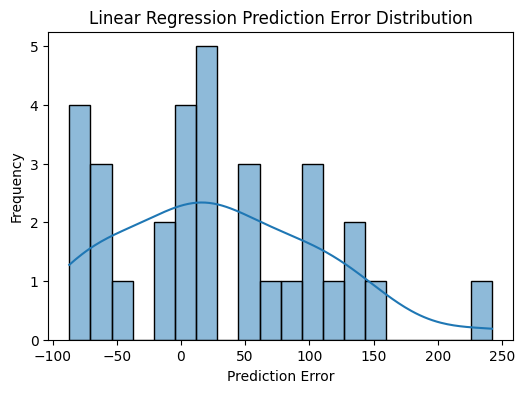

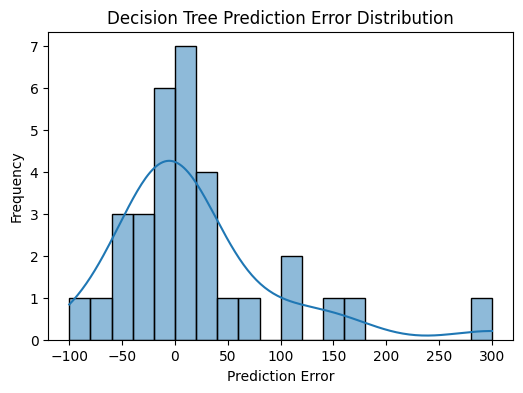

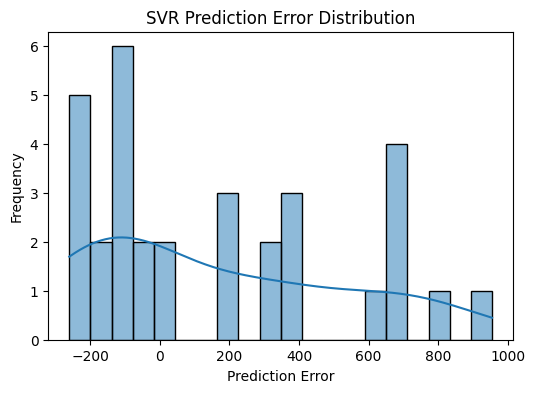

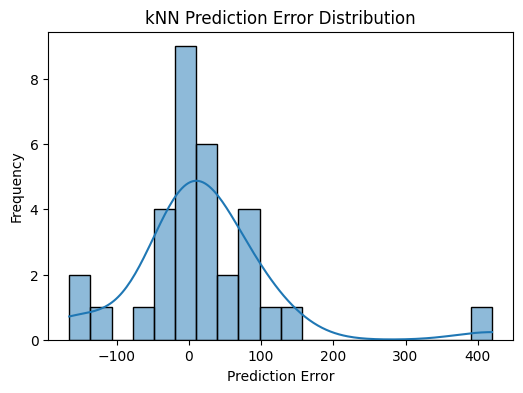

In [53]:
for name, model in models.items():
  y_pred = model.predict(X_test_scaled)
  error = y_test-y_pred

  plt.figure(figsize=(6,4))
  sns.histplot(error, bins=20, kde=True)
  plt.title(f"{name} Prediction Error Distribution")
  plt.xlabel("Prediction Error")
  plt.ylabel("Frequency")
  plt.show

Parity plots (y_test vs y_pred)

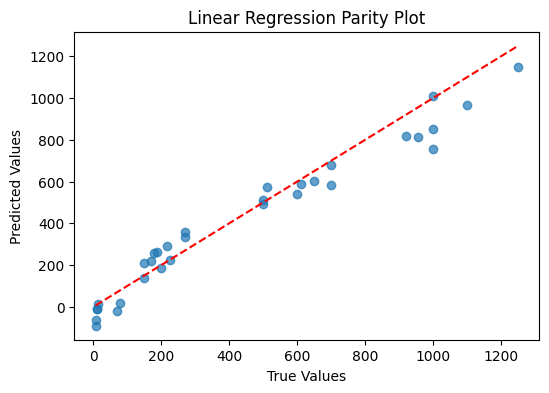

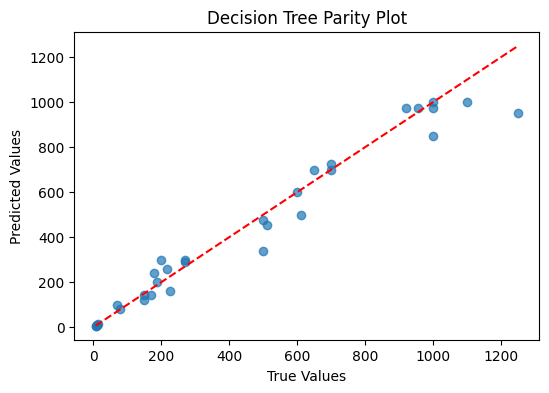

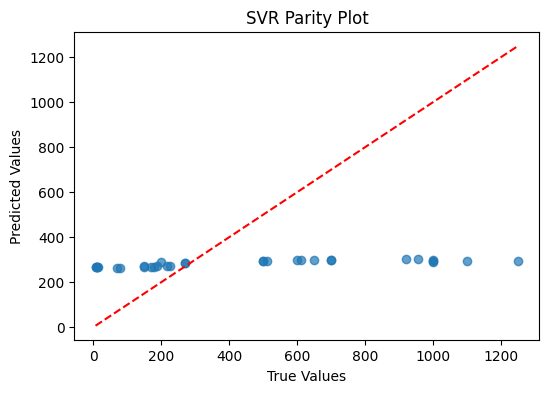

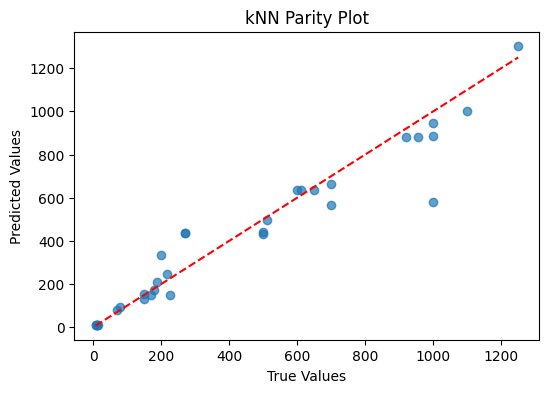

In [54]:
for name, model in models.items():
  y_pred = model.predict(X_test_scaled)

  plt.figure(figsize=(6,4))
  plt.scatter(y_test, y_pred, alpha=0.7)
  plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
  plt.title(f"{name} Parity Plot")
  plt.xlabel("True Values")
  plt.ylabel("Predicted Values")
  plt.show()

4) Find optimal parameters of the above created models with GridSearchCV() function based on the training dataset. Output the optimal values of parameters found for each model. Output and construct bar plots of the coefficients of the linear regression model. Which variables have the biggest influence on the output (dependent variables)?

https://www.geeksforgeeks.org/machine-learning/performing-feature-selection-with-gridsearchcv-in-sklearn/

In [73]:
import numpy as np
from sklearn.model_selection import GridSearchCV

Estimator: The machine learning model to be tuned.
Param_grid: Dictionary specifying the parameter grid to be searched.
Scoring: Metric used to evaluate model performance.Choose appropriate scoring metrics based on the problem at hand (e.g., roc_auc for classification).
CV: Cross-validation strategy.Use cross-validation to evaluate model performance and avoid overfitting.

In [74]:
param_grid_lr = {
    'fit_intercept': [True, False]
    }

param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
    }

param_grid_svr = {
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'rbf']
    }

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
    }  # p=1 Manhattan, p=2 Euclidean

models = {
    'LinearRegression': (LinearRegression(), param_grid_lr),
    'DecisionTree': (DecisionTreeRegressor(random_state=42), param_grid_dt),
    'SVR': (SVR(), param_grid_svr),
    'KNN': (KNeighborsRegressor(), param_grid_knn)
}

best_params = {}

for name, (model, params) in models.items():
    grid = GridSearchCV(model, params, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(X_train_scaled, y_train)
    best_params[name] = grid.best_params_
    print(f"Best params for {name}: {grid.best_params_}")

Best params for LinearRegression: {'fit_intercept': True}
Best params for DecisionTree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best params for SVR: {'C': 10, 'epsilon': 0.5, 'kernel': 'linear'}
Best params for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}


In [76]:
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()

# define the GridSearchCV

dt_grid = GridSearchCV(dt, param_grid_dt, cv=5, scoring="r2")
svr_grid = GridSearchCV(svr, param_grid_svr, cv=5, scoring="r2")
knn_grid = GridSearchCV(knn, param_grid_knn, cv=5, scoring="r2")

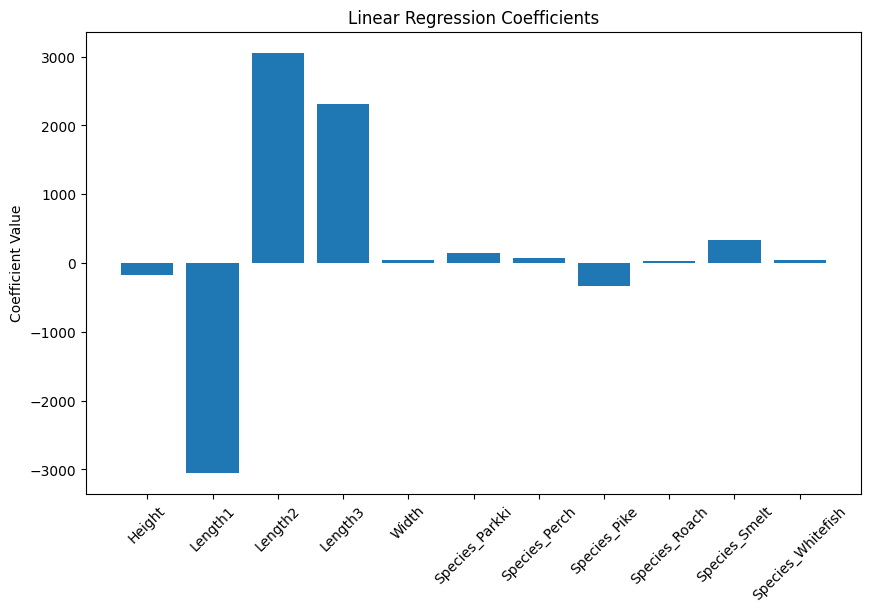


Features sorted by influence:
Length2: 3058.8412
Length1: -3045.6869
Length3: 2311.9842
Species_Pike: -331.3755
Species_Smelt: 330.6865
Height: -180.0806
Species_Parkki: 139.5624
Species_Perch: 74.6708
Width: 48.0348
Species_Whitefish: 47.6415
Species_Roach: 34.9948


In [82]:
# retrain the Linear Regression  model with the best values
best_lr = LinearRegression(**best_params['LinearRegression'])
best_lr.fit(X_train_scaled, y_train)

coefficients = best_lr.coef_
feature_names = X_train.columns  # If is X_train a dataframe

plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.xticks(rotation=45)
plt.title("Linear Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.show()

# the values that have the biggest effect
sorted_features = sorted(zip(feature_names, coefficients), key=lambda x: abs(x[1]), reverse=True)
print("\nFeatures sorted by influence:")
for feat, coef in sorted_features:
    print(f"{feat}: {coef:.4f}")

In [81]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

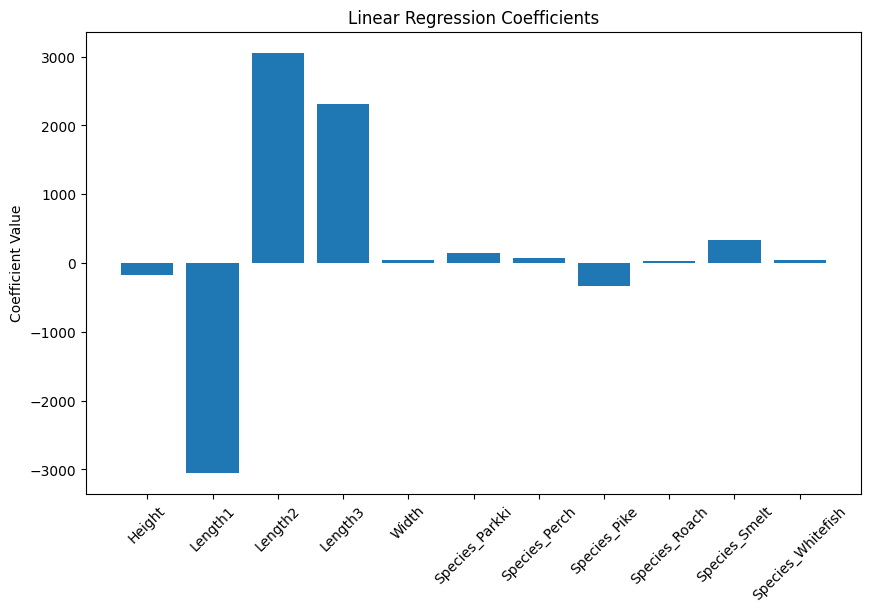

In [79]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train) # model fitting

# Coefficients
coefficients = lin_reg.coef_
feature_names = X_Encoded.columns # Should I use X or X_Encoded?

# Bar plot
plt.figure(figsize=(10,6))
plt.bar(feature_names, coefficients)
plt.xticks(rotation=45)
plt.title("Linear Regression Coefficients")
plt.ylabel("Coefficient Value")
plt.show()

4) Interpretation: Which variables matter most? bu sorunun ceavplarını açıklamam gerekiyor bu kısım eksik. ödevin sonunda bu soruları cevapla ve raporunu oluştur.

5) Evaluate the performance of the models with optimal values of the parameters. Output the results in the similar dataframe as in Task 2.3. Compare the results with obtained in Task 2.3. Make the conclusion about the best-fitted model before and after optimization of the parameters.

In [80]:
best_dt = DecisionTreeRegressor(**best_params['DecisionTree'])
best_dt.fit(X_train_scaled, y_train)

best_svr = SVR(**best_params['SVR'])
best_svr.fit(X_train_scaled, y_train)

best_knn = KNeighborsRegressor(**best_params['KNN'])
best_knn.fit(X_train_scaled, y_train)

optimized_models = {
    "Linear Regression": best_lr,
    "Decision Tree": best_dt,
    "SVR": best_svr,
    "kNN": best_knn
}

# Empty dicts
opt_train_r2 = {}
opt_test_r2 = {}
opt_train_mse = {}
opt_test_mse = {}
opt_train_mae = {}
opt_test_mae = {}

# Loop to evaluate optimized models
for name, model in optimized_models.items():
    model.fit(X_train_scaled, y_train)

    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    opt_train_r2[name] = r2_score(y_train, y_train_pred)
    opt_test_r2[name] = r2_score(y_test, y_test_pred)

    opt_train_mse[name] = mean_squared_error(y_train, y_train_pred)
    opt_test_mse[name] = mean_squared_error(y_test, y_test_pred)

    opt_train_mae[name] = mean_absolute_error(y_train, y_train_pred)
    opt_test_mae[name] = mean_absolute_error(y_test, y_test_pred)


# Create DataFrames
df_r2_opt = pd.DataFrame({"Train R2": opt_train_r2, "Test R2": opt_test_r2})
df_mse_opt = pd.DataFrame({"Train MSE": opt_train_mse, "Test MSE": opt_test_mse})
df_mae_opt = pd.DataFrame({"Train MAE": opt_train_mae, "Test MAE": opt_test_mae})

display(df_r2_opt)
display(df_mse_opt)
display(df_mae_opt)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

 Output the prediction results of the models with optimal parameters: create a dataframe with 5 columns, which correspond to "real values" and predicted values by each model on the testset and rows correspond to the observations from the testset. Construct a plot, which illustrates sample predictions for each model for randomly selected 10 observations from the testset (X-axis: observations, Y-axis: predicted value) and compare them to the real values. Construct a parity plot for each of the models

In [ ]:
# Generate predictions from optimized models
pred_lr = best_lr.predict(X_test_scaled)
pred_dt = best_dt.predict(X_test_scaled)
pred_svr = best_svr.predict(X_test_scaled)
pred_knn = best_knn.predict(X_test_scaled)

# Create dataframe of predictions
pred_df = pd.DataFrame({
    "Real Values": y_test.values,
    "LR Prediction": pred_lr,
    "DT Prediction": pred_dt,
    "SVR Prediction": pred_svr,
    "kNN Prediction": pred_knn
})

pred_df.head()

Real Values  LR Prediction  DT Prediction  SVR Prediction  kNN Prediction
0         78.0      18.738254      83.428571       76.247631       88.844720
1         13.4      11.886420       9.475000       12.539928       11.506387
2        200.0     187.711281     311.250000      270.014800      300.000000
3        270.0     332.739895     268.888889      310.830661      409.600359
4        150.0     212.097016     146.666667      164.196493      133.347636

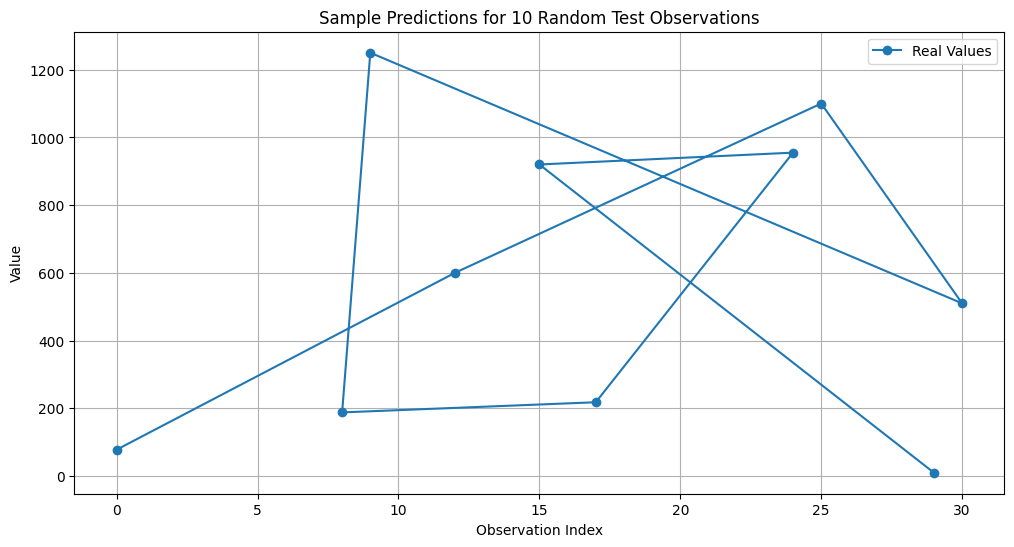

In [ ]:
# Randomly select 10 observations from test set
np.random.seed(42)
indices = np.random.choice(len(y_test), 10, replace=False)

plt.figure(figsize=(12,6))

plt.plot(pred_df["Real Values"].iloc[indices], marker='o', label="Real Values")

plt.title("Sample Predictions for 10 Random Test Observations")
plt.xlabel("Observation Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

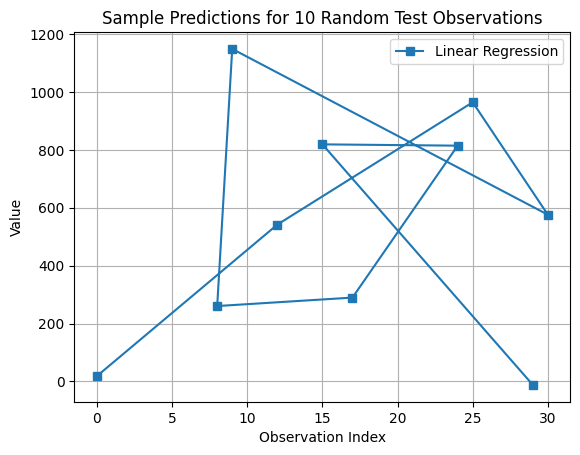

In [ ]:
plt.plot(pred_df["LR Prediction"].iloc[indices], marker='s', label="Linear Regression")

plt.title("Sample Predictions for 10 Random Test Observations")
plt.xlabel("Observation Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

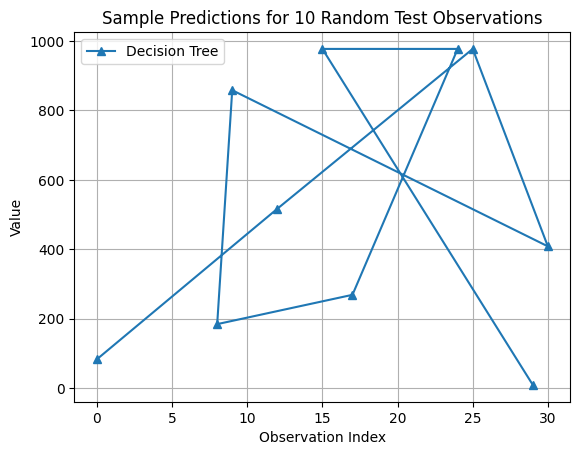

In [ ]:
plt.plot(pred_df["DT Prediction"].iloc[indices], marker='^', label="Decision Tree")

plt.title("Sample Predictions for 10 Random Test Observations")
plt.xlabel("Observation Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

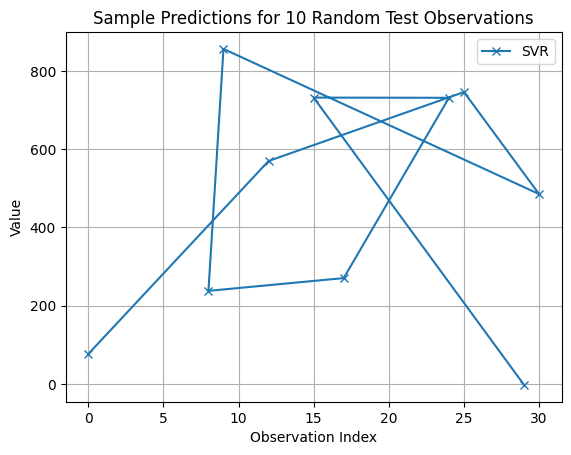

In [ ]:
plt.plot(pred_df["SVR Prediction"].iloc[indices], marker='x', label="SVR")

plt.title("Sample Predictions for 10 Random Test Observations")
plt.xlabel("Observation Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

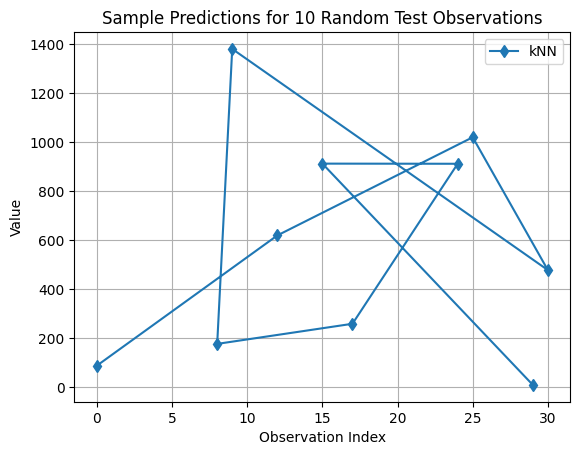

In [ ]:
plt.plot(pred_df["kNN Prediction"].iloc[indices], marker='d', label="kNN")

plt.title("Sample Predictions for 10 Random Test Observations")
plt.xlabel("Observation Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

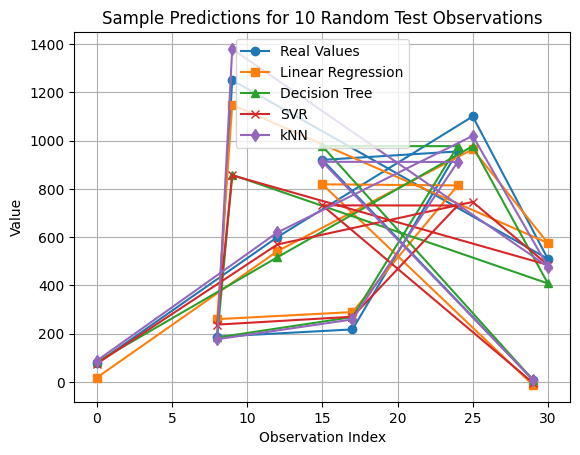

In [ ]:
plt.plot(pred_df["Real Values"].iloc[indices], marker='o', label="Real Values")
plt.plot(pred_df["LR Prediction"].iloc[indices], marker='s', label="Linear Regression")
plt.plot(pred_df["DT Prediction"].iloc[indices], marker='^', label="Decision Tree")
plt.plot(pred_df["SVR Prediction"].iloc[indices], marker='x', label="SVR")
plt.plot(pred_df["kNN Prediction"].iloc[indices], marker='d', label="kNN")

plt.title("Sample Predictions for 10 Random Test Observations")
plt.xlabel("Observation Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()

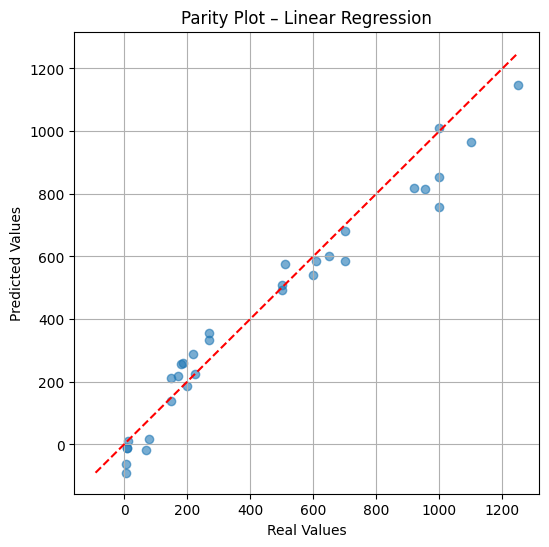

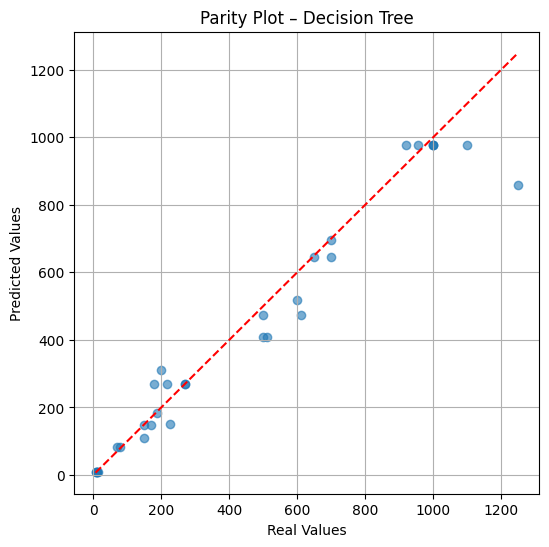

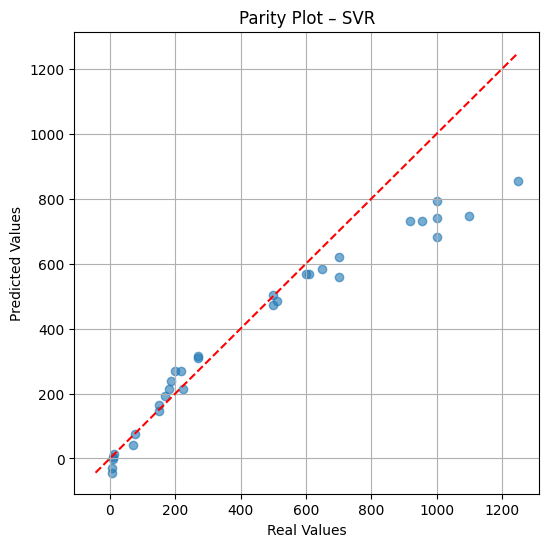

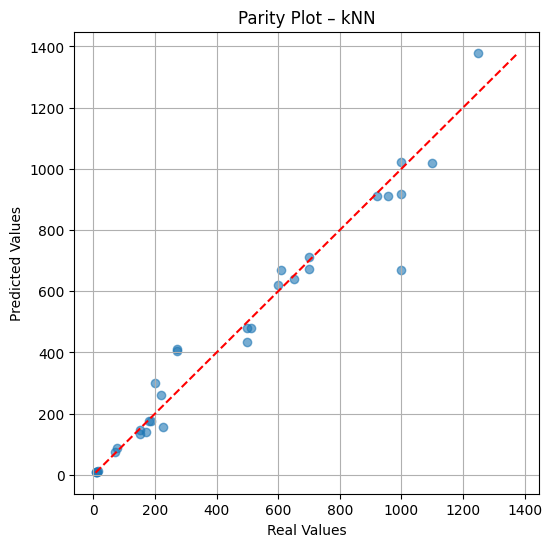

In [ ]:
models_opt = {
    "Linear Regression": pred_lr,
    "Decision Tree": pred_dt,
    "SVR": pred_svr,
    "kNN": pred_knn
}

for name, predictions in models_opt.items():
    plt.figure(figsize=(6,6))
    plt.scatter(y_test, predictions, alpha=0.6)

    # diagonal line
    min_val = min(y_test.min(), predictions.min())
    max_val = max(y_test.max(), predictions.max())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--')

    plt.title(f"Parity Plot – {name}")
    plt.xlabel("Real Values")
    plt.ylabel("Predicted Values")
    plt.grid(True)
    plt.show()


7) Calculate the prediction errors of each observation from the testset and obtained by each model. Make conclusions about the predictions, which have the biggest prediction error. Compare the prediction errors. Are there any observations badly predicted by all the methods?

In [ ]:
results = pd.DataFrame({
    "Real Values": y_test.values,
    "LR Prediction": pred_lr,
    "DT Prediction": pred_dt,
    "SVR Prediction": pred_svr,
    "kNN Prediction": pred_knn
})


# Calculate errors with unique column names
errors = pd.DataFrame({
    "err_lr": (results["Real Values"] - results["LR Prediction"]).abs(),
    "err_dt": (results["Real Values"] - results["DT Prediction"]).abs(),
    "err_svr": (results["Real Values"] - results["SVR Prediction"]).abs(),
    "err_knn": (results["Real Values"] - results["kNN Prediction"]).abs(),
})

# Calculate max_error_model and max_error_value
errors["max_error_model"] = errors[['err_lr', 'err_dt', 'err_svr', 'err_knn']].idxmax(axis=1)
errors["max_error_value"] = errors[['err_lr', 'err_dt', 'err_svr', 'err_knn']].max(axis=1)

In [ ]:
errors["max_error_model"]

0      err_lr
1      err_dt
2      err_dt
3     err_knn
4      err_lr
5     err_svr
6      err_lr
7      err_dt
8      err_lr
9     err_svr
10    err_svr
11    err_knn
12     err_dt
13     err_dt
14    err_svr
15    err_svr
16    err_svr
17     err_lr
18     err_dt
19    err_svr
20     err_lr
21     err_dt
22     err_dt
23     err_dt
24    err_svr
25    err_svr
26     err_lr
27    err_knn
28     err_lr
29     err_lr
30     err_dt
31     err_lr
Name: max_error_model, dtype: object

In [ ]:
errors["max_error_value"]

0      59.261746
1       3.925000
2     111.250000
3     139.600359
4      62.097016
5     258.591042
6      68.143019
7      88.888889
8      72.494792
9     393.962801
10     65.960380
11    330.197812
12     83.333333
13     40.000000
14     79.269734
15    188.356667
16    208.313331
17     71.704760
18     73.750000
19    141.269837
20     21.022652
21    135.000000
22     91.571429
23     25.000000
24    223.846793
25    354.135006
26     49.240454
27    135.135872
28     97.106643
29     21.774622
30    101.571429
31     88.412527
Name: max_error_value, dtype: float64

In [ ]:
full = pd.concat([results, errors], axis=1) # merge it back with original
full

Real Values  LR Prediction  DT Prediction  SVR Prediction  kNN Prediction  \
0          78.0      18.738254      83.428571       76.247631       88.844720   
1          13.4      11.886420       9.475000       12.539928       11.506387   
2         200.0     187.711281     311.250000      270.014800      300.000000   
3         270.0     332.739895     268.888889      310.830661      409.600359   
4         150.0     212.097016     146.666667      164.196493      133.347636   
5        1000.0     757.761616     976.875000      741.408958      916.557720   
6           7.0     -61.143019       9.475000      -27.847169        8.098054   
7         180.0     255.772525     268.888889      215.226829      176.196231   
8         188.0     260.494792     184.500000      237.827316      177.369593   
9        1250.0    1148.322830     858.000000      856.037199     1379.489358   
10        650.0     600.428130     645.000000      584.039620      640.367508   
11       1000.0     852.956669     976.875000      682.753858      669.802188   
12        600.0     541.634898     516.666667      569.618756      619.321376   
13        150.0     140.057965     110.000000      146.795532      145.836299   
14        700.0     680.963249     696.000000      620.730266      711.030317   
15        920.0     818.784983     976.875000      731.643333      912.024894   
16       1000.0    1009.771417     976.875000      791.686669     1021.779657   
17        218.0     289.704760     268.888889      270.442665      259.322187   
18        225.0     226.067167     151.250000      213.384971      156.358471   
19        700.0     585.138874     645.000000      558.730163      671.212880   
20         10.0     -11.022652       9.475000        3.936907       10.194643   
21        610.0     585.707041     475.000000      567.667025      668.566520   
22        500.0     509.582200     408.428571      471.609339      433.595081   
23        500.0     492.021106     475.000000      503.585296      479.507480   
24        955.0     814.270866     976.875000      731.153207      911.427687   
25       1100.0     964.090051     976.875000      745.864994     1019.418126   
26        170.0     219.240454     146.666667      191.841186      141.420122   
27        270.0     356.938198     268.888889      314.498518      405.135872   
28          6.7     -90.406643       9.475000      -43.899967        8.394566   
29          9.9     -11.874622       9.475000       -2.523651       10.119664   
30        510.0     575.807996     408.428571      485.093268      478.123557   
31         70.0     -18.412527      83.428571       42.505243       75.040487   

        err_lr      err_dt     err_svr     err_knn max_error_model  \
0    59.261746    5.428571    1.752369   10.844720          err_lr   
1     1.513580    3.925000    0.860072    1.893613          err_dt   
2    12.288719  111.250000   70.014800  100.000000          err_dt   
3    62.739895    1.111111   40.830661  139.600359         err_knn   
4    62.097016    3.333333   14.196493   16.652364          err_lr   
5   242.238384   23.125000  258.591042   83.442280         err_svr   
6    68.143019    2.475000   34.847169    1.098054          err_lr   
7    75.772525   88.888889   35.226829    3.803769          err_dt   
8    72.494792    3.500000   49.827316   10.630407          err_lr   
9   101.677170  392.000000  393.962801  129.489358         err_svr   
10   49.571870    5.000000   65.960380    9.632492         err_svr   
11  147.043331   23.125000  317.246142  330.197812         err_knn   
12   58.365102   83.333333   30.381244   19.321376          err_dt   
13    9.942035   40.000000    3.204468    4.163701          err_dt   
14   19.036751    4.000000   79.269734   11.030317         err_svr   
15  101.215017   56.875000  188.356667    7.975106         err_svr   
16    9.771417   23.125000  208.313331   21.779657         err_svr   
17   71.704760   50.888889   52.442665   41.322187          err_lr   


In [ ]:
threshold = errors[['err_lr', 'err_dt', 'err_svr', 'err_knn']].quantile(0.9)  # top 10% errors for each model

bad_all = errors[
    (errors["err_lr"] > threshold["err_lr"]) &
    (errors["err_dt"] > threshold["err_dt"]) &
    (errors["err_svr"] > threshold["err_svr"])&
    (errors["err_knn"] > threshold["err_knn"])
]

8) Change the random_state in task 2.1 and re-calculate all the previous steps. Are your conclusions about the best model the same? Make conclusions averaging the performance results for to five different random states. Construct the BoxPlots for each ML method and for each of the performance metrics, corresponding to the five different runs. Construct the Bar Plots for each ML method and for each of the performance metrics with average performance results. Describe and interpret the results.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_Encoded,   # encoded features
    Y,           # target variable
    test_size=0.2,
    random_state=42
)

print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

random_states = [0, 21, 42, 123, 999]

X_train: (127, 11)
X_test: (32, 11)
y_train: (127,)
y_test: (32,)


In [ ]:
random_states = [0, 21, 42, 123, 999]

# Container for all runs
results_all_runs = []

# -----------------------------
# LOOP THROUGH RANDOM STATES
# -----------------------------
for rs in random_states:
    print(f"\nRunning pipeline for random_state = {rs} ...")

    # 1) Train-test split
    X_train, X_test, y_train, y_test = train_test_split(
        X_Encoded, Y, test_size=0.2, random_state=rs
    )

    # 2) Scaling (only X!)
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # -------------------------
    # MODELS WITH DEFAULT PARAMS
    # -------------------------
    models = {
        "LinearRegression": LinearRegression(),
        "DecisionTree": DecisionTreeRegressor(),
        "SVR": SVR(),
        "KNN": KNeighborsRegressor()
    }

    # -------------------------
    # TRAIN + EVALUATE MODELS
    # -------------------------
    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train)
        y_pred_train = model.predict(X_train_scaled)
        y_pred_test = model.predict(X_test_scaled)

        # Metrics
        train_mae = mean_absolute_error(y_train, y_pred_train)
        test_mae = mean_absolute_error(y_test, y_pred_test)

        train_mse = mean_squared_error(y_train, y_pred_train)
        test_mse = mean_squared_error(y_test, y_pred_test)

        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)

        # Save all results
        results_all_runs.append({
            "random_state": rs,
            "model": model_name,
            "train_MAE": train_mae,
            "test_MAE": test_mae,
            "train_MSE": train_mse,
            "test_MSE": test_mse,
            "train_R2": train_r2,
            "test_R2": test_r2
        })

# Convert results to a DataFrame
df_results = pd.DataFrame(results_all_runs)
df_results



Running pipeline for random_state = 0 ...

Running pipeline for random_state = 21 ...

Running pipeline for random_state = 42 ...

Running pipeline for random_state = 123 ...

Running pipeline for random_state = 999 ...


random_state             model   train_MAE    test_MAE      train_MSE  \
0              0  LinearRegression   60.732961   88.698815    7212.922598   
1              0      DecisionTree    0.000000   55.350000       0.000000   
2              0               SVR  249.809951  335.979244  113097.985980   
3              0               KNN   35.799055  106.845625    4616.279660   
4             21  LinearRegression   67.471946   74.403195    8048.256739   
5             21      DecisionTree    0.393701   47.112500       9.842520   
6             21               SVR  277.166740  233.089034  150347.501210   
7             21               KNN   39.339370   43.729375    5478.514561   
8             42  LinearRegression   69.172842   65.300052    8777.604783   
9             42      DecisionTree    0.393701   47.775000       9.842520   
10            42               SVR  257.184851  310.556960  127083.841364   
11            42               KNN   39.805354   59.657500    4819.272164   
12           123  LinearRegression   65.728921   75.135905    8231.987830   
13           123      DecisionTree    0.393701   58.093750       9.842520   
14           123               SVR  255.176720  317.999207  125220.750440   
15           123               KNN   40.990866   69.960000    6157.485726   
16           999  LinearRegression   70.682306   58.494963    8991.484444   
17           999      DecisionTree    0.393701   65.590625       9.842520   
18           999               SVR  266.794381  274.687316  133550.860422   
19           999               KNN   43.322205   51.176250    7458.011565   

         test_MSE  train_R2   test_R2  
0    17086.819832  0.934285  0.910235  
1     5752.010625  1.000000  0.969782  
2   220664.049096 -0.030407 -0.159250  
3    39066.101363  0.957942  0.794768  
4     9516.597328  0.942866  0.870720  
5     4142.133125  0.999930  0.943730  
6    86124.647178 -0.067303 -0.169978  
7     4538.696613  0.961109  0.938343  
8     7007.383190  0.928596  0.950735  
9     6571.511875  0.999920  0.953800  
10  159404.969864 -0.033805 -0.120682  
11   10058.164400  0.960796  0.929287  
12    8779.796163  0.930566  0.945601  
13    9427.221250  0.999917  0.941590  
14  174351.065385 -0.056196 -0.080268  
15   20553.437325  0.948064  0.872652  
16    5392.727591  0.929800  0.956252  
17   13171.600937  0.999923  0.893148  
18  120982.065542 -0.042681  0.018553  
19    7118.778150  0.941773  0.942250

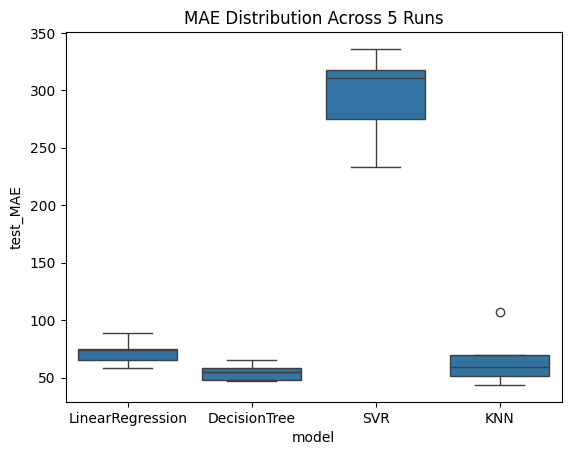

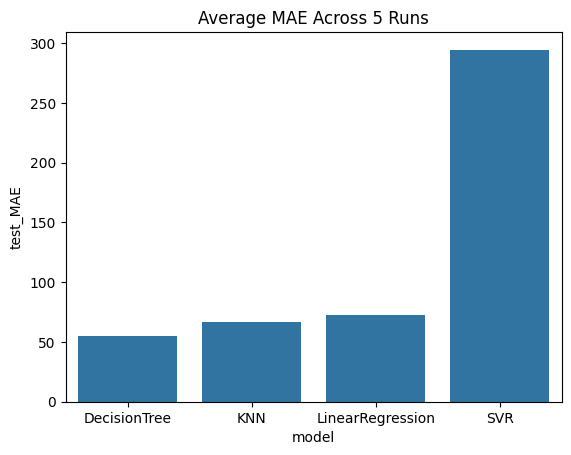

In [ ]:
sns.boxplot(data=df_results, x="model", y="test_MAE")
plt.title("MAE Distribution Across 5 Runs")
plt.show()

avg_results = df_results.groupby("model").mean().reset_index() # compute the avarage

sns.barplot(data=avg_results, x="model", y="test_MAE")
plt.title("Average MAE Across 5 Runs")
plt.show()

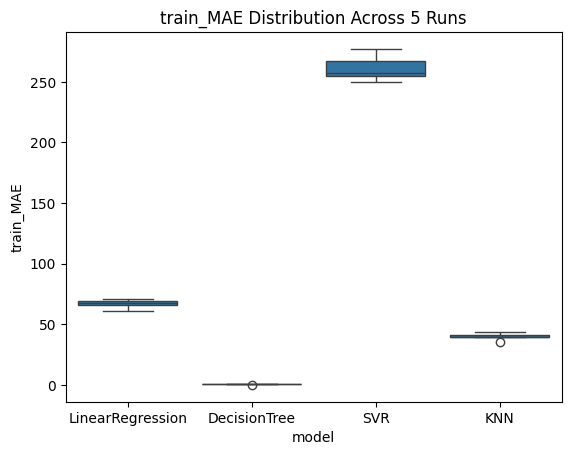

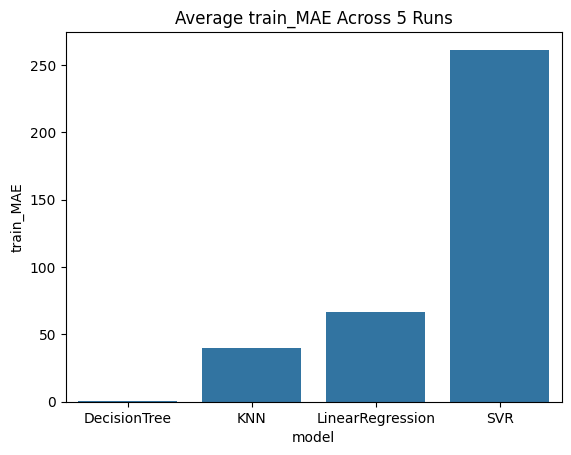

In [ ]:
sns.boxplot(data=df_results, x="model", y="train_MAE")
plt.title("train_MAE Distribution Across 5 Runs")
plt.show()

avg_results = df_results.groupby("model").mean().reset_index() # compute the avarage

sns.barplot(data=avg_results, x="model", y="train_MAE")
plt.title("Average train_MAE Across 5 Runs")
plt.show()

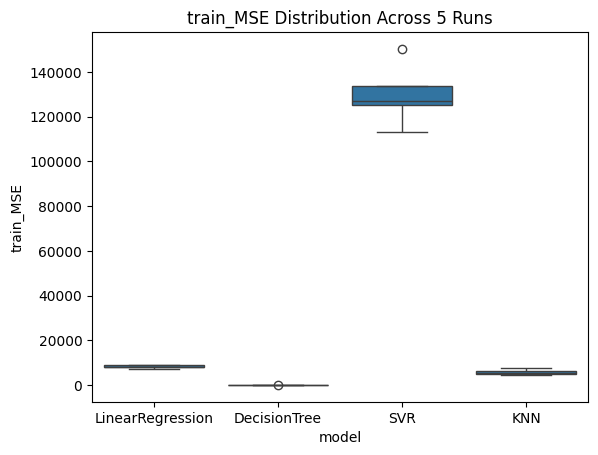

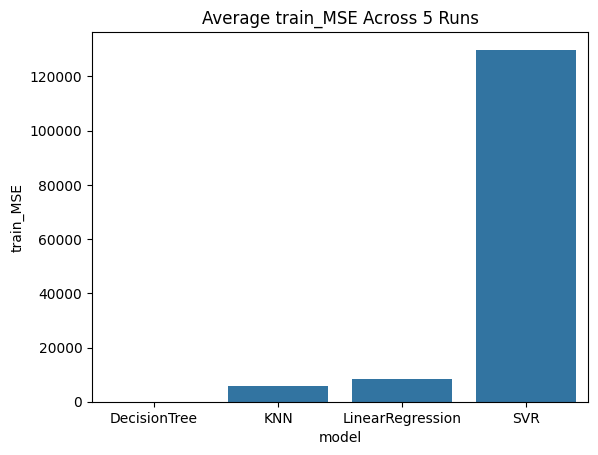

In [ ]:
sns.boxplot(data=df_results, x="model", y="train_MSE")
plt.title("train_MSE Distribution Across 5 Runs")
plt.show()

avg_results = df_results.groupby("model").mean().reset_index() # compute the avarage

sns.barplot(data=avg_results, x="model", y="train_MSE")
plt.title("Average train_MSE Across 5 Runs")
plt.show()

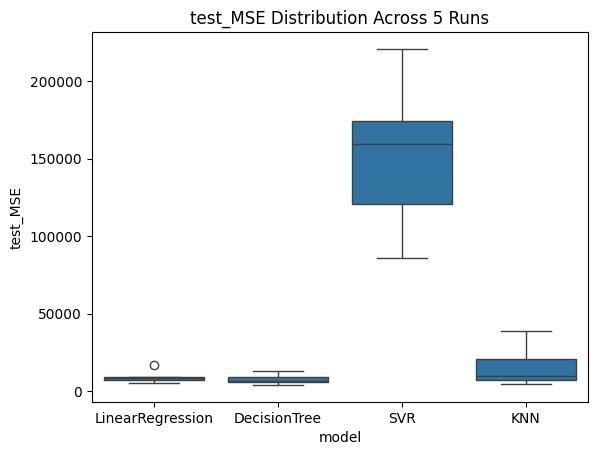

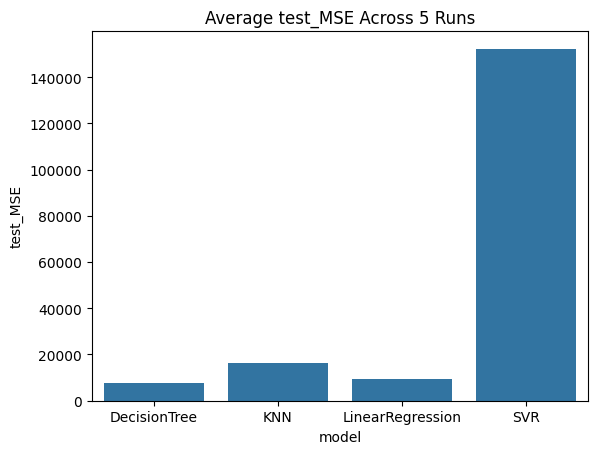

In [ ]:
sns.boxplot(data=df_results, x="model", y="test_MSE")
plt.title("test_MSE Distribution Across 5 Runs")
plt.show()

avg_results = df_results.groupby("model").mean().reset_index() # compute the avarage

sns.barplot(data=avg_results, x="model", y="test_MSE")
plt.title("Average test_MSE Across 5 Runs")
plt.show()

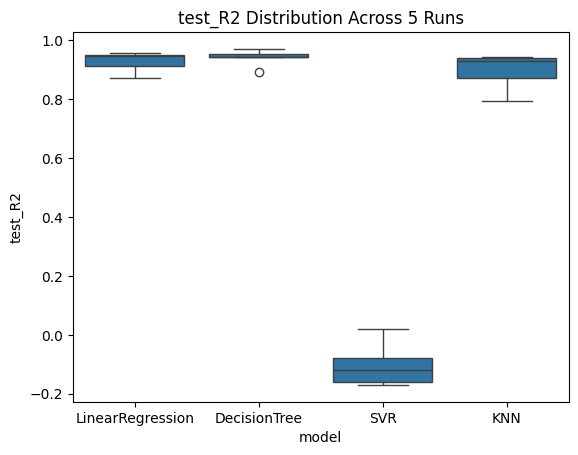

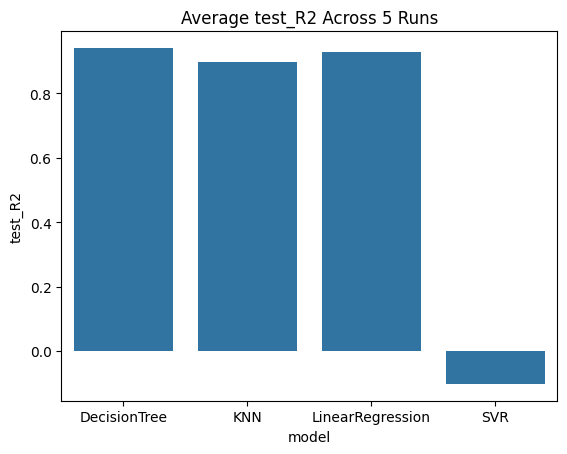

In [ ]:
sns.boxplot(data=df_results, x="model", y="test_R2")
plt.title("test_R2 Distribution Across 5 Runs")
plt.show()

avg_results = df_results.groupby("model").mean().reset_index() # compute the avarage

sns.barplot(data=avg_results, x="model", y="test_R2")
plt.title("Average test_R2 Across 5 Runs")
plt.show()

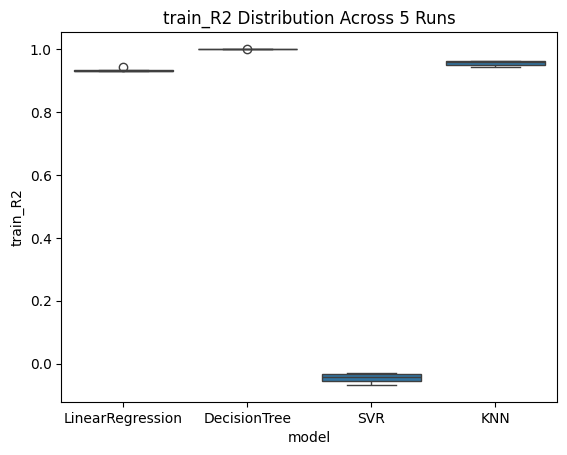

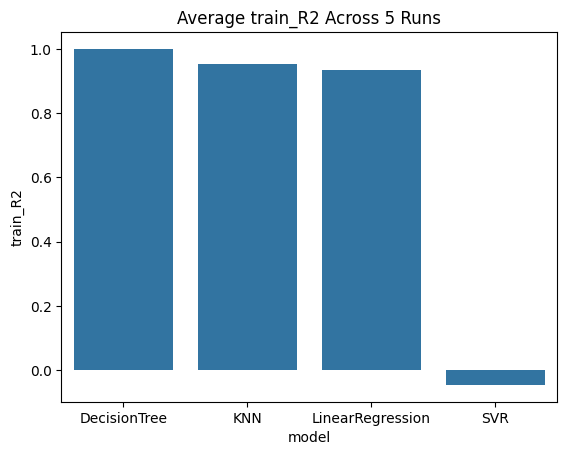

In [ ]:
sns.boxplot(data=df_results, x="model", y="train_R2")
plt.title("train_R2 Distribution Across 5 Runs")
plt.show()

avg_results = df_results.groupby("model").mean().reset_index() # compute the avarage

sns.barplot(data=avg_results, x="model", y="train_R2")
plt.title("Average train_R2 Across 5 Runs")
plt.show()

**Task 3: Kfold cross validation**

K-fold, makine öğrenmesinde modelin genelleme yeteneğini ölçmek için kullanılan bir doğrulama tekniğidir. Bu yöntemde, veri kümesi rastgele olarak birbirine eşit 'K' sayıda alt kümeye (katlara) bölünür. Model, her adımda 'K-1' kat üzerinde eğitilir ve kalan tek kat üzerinde test edilir. Bu işlem, her katın test kümesi olarak kullanılmasıyla 'K' kez tekrarlanır ve sonuçların ortalaması alınarak daha güvenilir bir performans ölçümü elde edilir.

Neden kullanılır?
Modelin performansını daha güvenilir bir şekilde ölçmek için.
Modelin yeni veriler üzerinde ne kadar iyi performans göstereceğini tahmin etmek için.
Tek bir eğitim/test bölmesine göre daha sağlam bir sonuç elde etmek için.

K-fold'un önemi
Dengeli değerlendirme: Her katın hem eğitim hem de test için kullanılması, modelin veri kümesinin farklı kısımlarını öğrenmesini ve test etmesini sağlar.
Yüksek güvenilirlik: Sonuçların ortalamasının alınması, tek bir rastgele bölmenin getirebileceği yanlılığı azaltır ve daha kararlı bir performans tahmini sunar.
Standart pratik: Özellikle standart bir uygulama olarak 10-Fold (10-katlı) çapraz doğrulama, genellikle iyi bir yanlılık-varyans dengesi sunduğu için yaygın olarak tercih edilir.

Concept Summary (write this in homework)

KFold divides your dataset into k equal parts ("folds").

In each iteration:

One fold is used as validation

The remaining k−1 folds are used as training

Each observation appears exactly once in a validation fold.

This reduces dependence on a single random train/test split.

https://www.geeksforgeeks.org/machine-learning/k-fold-cross-validation-in-machine-learning/

https://medium.com/@edatasasiz/k-fold-cross-validation-nedir-ab2107fce616

https://www.kaggle.com/code/satishgunjal/tutorial-k-fold-cross-validation

1) Use the functions Kfold to split your data into 5 disjoint datasets. Output the indexes of the observations in each splited dataset.

In [ ]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import RandomForestRegressor

X = X_Encoded
y = Y

kFold = KFold(n_splits=5, shuffle = True, random_state = 42) # The first random_state was chosed

# Print indexes of each split
for i, (train_index, test_index) in enumerate(kFold.split(X)):
    print(f"Fold {i+1}")
    print("Train indexes:", train_index)
    print("Test indexes:", test_index)
    print("-" * 30)

Fold 1
Train indexes: [  0   1   2   3   4   5   6   7   8  10  11  13  14  17  20  21  22  23
  25  26  27  28  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  50  52  53  54  57  58  59  61  62  63  64  66  67  68
  69  70  71  72  73  74  75  77  79  80  81  82  83  84  85  86  87  88
  89  90  91  92  93  97  99 100 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 119 120 121 122 123 124 127 129 130 131 132
 133 134 136 137 138 139 140 142 143 144 146 148 149 150 153 154 156 157
 158]
Test indexes: [  9  12  15  16  18  19  24  29  30  31  51  55  56  60  65  76  78  94
  95  96  98 101 125 126 128 135 141 145 147 151 152 155]
------------------------------
Fold 2
Train indexes: [  0   1   3   5   6   7   8   9  10  12  13  14  15  16  17  18  19  20
  21  23  24  25  28  29  30  31  33  34  35  37  38  39  40  43  44  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  67  70  71  72  73  74  76  77  78  79

2) Build 5 models for each of the ML methods, each time taking one dataset as a testset and joint remaining datasets as a training set. Use the best hyper-parameter values for each model found in task 2.

In [ ]:
best_params = {
    "Linear Regression": {}, # Linear Regression was not hyperparameter tuned in Task 2. Using default params.
    "Decision Tree": {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10},
    "SVR": {'C': 50, 'epsilon': 0.1, 'kernel': 'linear'},
    "kNN": {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
}
r2_scores = {
    "Linear Regression": [],
    "Decision Tree": [],
    "SVR": [],
    "kNN": []
}
mae = {
    "Linear Regression": [],
    "Decision Tree": [],
    "SVR": [],
    "kNN": []
}
mse = {
    "Linear Regression": [],
    "Decision Tree": [],
    "SVR": [],
    "kNN": []
}

In [ ]:
fold_num = 1 # Start fold numbering from 1

for train_index, test_index in kFold.split(X):
    # Correctly select rows using .iloc because data is not np_Array. Hence we have to use .iloc
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Scale data for the current fold, as the train/test sets change
    scaler = MinMaxScaler()
    X_train_scaled_fold = scaler.fit_transform(X_train_fold)
    X_test_scaled_fold = scaler.transform(X_test_fold)

    print(f"Fold {fold_num}")

    # Linear Regression
    lr_model = LinearRegression(**best_params["Linear Regression"]) # Use optimal params
    lr_model.fit(X_train_scaled_fold, y_train_fold)
    lr_pred = lr_model.predict(X_test_scaled_fold)
    r2_scores["Linear Regression"].append(r2_score(y_test_fold, lr_pred))
    mae["Linear Regression"].append(mean_absolute_error(y_test_fold, lr_pred))
    mse["Linear Regression"].append(mean_squared_error(y_test_fold, lr_pred))
    print(f"  Linear Regression R2: {r2_score(y_test_fold, lr_pred):.4f}, MSE: {mean_squared_error(y_test_fold, lr_pred):.4f}, MAE: {mean_absolute_error(y_test_fold, lr_pred):.4f}")

    # Decision Tree
    dt_model = DecisionTreeRegressor(**best_params["Decision Tree"]) # Use optimal params
    dt_model.fit(X_train_scaled_fold, y_train_fold)
    dt_pred = dt_model.predict(X_test_scaled_fold)
    r2_scores["Decision Tree"].append(r2_score(y_test_fold, dt_pred))
    mae["Decision Tree"].append(mean_absolute_error(y_test_fold, dt_pred))
    mse["Decision Tree"].append(mean_squared_error(y_test_fold, dt_pred))
    print(f"  Decision Tree R2: {r2_score(y_test_fold, dt_pred):.4f}, MSE: {mean_squared_error(y_test_fold, dt_pred):.4f}, MAE: {mean_absolute_error(y_test_fold, dt_pred):.4f}")

    # SVR
    svr_model = SVR(**best_params["SVR"]) # Use optimal params
    svr_model.fit(X_train_scaled_fold, y_train_fold)
    svr_pred = svr_model.predict(X_test_scaled_fold)
    r2_scores["SVR"].append(r2_score(y_test_fold, svr_pred))
    mae["SVR"].append(mean_absolute_error(y_test_fold, svr_pred))
    mse["SVR"].append(mean_squared_error(y_test_fold, svr_pred))
    print(f"  SVR R2: {r2_score(y_test_fold, svr_pred):.4f}, MSE: {mean_squared_error(y_test_fold, svr_pred):.4f}, MAE: {mean_absolute_error(y_test_fold, svr_pred):.4f}")

    # KNN
    knn_model = KNeighborsRegressor(**best_params["kNN"]) # Use optimal params
    knn_model.fit(X_train_scaled_fold, y_train_fold)
    knn_pred = knn_model.predict(X_test_scaled_fold)
    r2_scores["kNN"].append(r2_score(y_test_fold, knn_pred))
    mae["kNN"].append(mean_absolute_error(y_test_fold, knn_pred))
    mse["kNN"].append(mean_squared_error(y_test_fold, knn_pred))
    print(f"  kNN R2: {r2_score(y_test_fold, knn_pred):.4f}, MSE: {mean_squared_error(y_test_fold, knn_pred):.4f}, MAE: {mean_absolute_error(y_test_fold, knn_pred):.4f}")

    fold_num += 1
    print("-" * 40)

Fold 1
  Linear Regression R2: 0.9507, MSE: 7007.3832, MAE: 65.3001
  Decision Tree R2: 0.9445, MSE: 7888.1302, MAE: 49.6836
  SVR R2: 0.8611, MSE: 19763.4791, MAE: 88.6965
  kNN R2: 0.9543, MSE: 6498.1764, MAE: 47.2708
----------------------------------------
Fold 2
  Linear Regression R2: 0.9390, MSE: 6179.5760, MAE: 56.3494
  Decision Tree R2: 0.9677, MSE: 3278.3850, MAE: 40.0967
  SVR R2: 0.9246, MSE: 7647.4497, MAE: 57.9805
  kNN R2: 0.9668, MSE: 3369.1532, MAE: 38.6171
----------------------------------------
Fold 3
  Linear Regression R2: 0.9212, MSE: 11988.5375, MAE: 83.7017
  Decision Tree R2: 0.9539, MSE: 7011.8469, MAE: 49.7400
  SVR R2: 0.8125, MSE: 28531.3623, MAE: 93.8964
  kNN R2: 0.9809, MSE: 2905.9570, MAE: 36.8330
----------------------------------------
Fold 4
  Linear Regression R2: 0.8956, MSE: 16798.1816, MAE: 85.5231
  Decision Tree R2: 0.9566, MSE: 6976.7227, MAE: 60.8881
  SVR R2: 0.7596, MSE: 38683.2941, MAE: 116.1023
  kNN R2: 0.9646, MSE: 5700.5100, MAE: 42.

In [ ]:
print("\n=== Average R2 Scores Across Folds ===")
for model_name, scores in r2_scores.items():
    print(f"{model_name}: mean R2 = {np.mean(scores):.4f}, scores = {scores}")

print("\n=== Average MAE Scores Across Folds ===")
for model_name, scores in mae.items():
    print(f"{model_name}: mean MAE = {np.mean(scores):.4f}, scores = {scores}")

print("\n=== Average MSE Scores Across Folds ===")
for model_name, scores in mse.items():
    print(f"{model_name}: mean MSE = {np.mean(scores):.4f}, scores = {scores}")


=== Average R2 Scores Across Folds ===
Linear Regression: mean R2 = 0.9161, scores = [0.9507352480054504, 0.9390417971018475, 0.9211969071229754, 0.8955866211814811, 0.873811103053007]
Decision Tree: mean R2 = 0.9503, scores = [0.944543238379084, 0.9676604900712813, 0.9539097057229855, 0.9566344021901786, 0.9288407418388505]
SVR: mean R2 = 0.8519, scores = [0.8610547090353649, 0.9245620102557032, 0.8124575582998621, 0.7595541270107871, 0.9020878418277182]
kNN: mean R2 = 0.9605, scores = [0.9543151790265916, 0.9667651101321063, 0.9808985544294707, 0.9645670274737421, 0.9357488142535384]

=== Average MAE Scores Across Folds ===
Linear Regression: mean MAE = 72.7672, scores = [65.30005153357416, 56.34940663559317, 83.70174124955264, 85.52309658158207, 72.96161640469934]
Decision Tree: mean MAE = 48.4500, scores = [49.68359375, 40.09668898809524, 49.740029761904765, 60.88813244047618, 41.841308243727596]
SVR: mean MAE = 82.4007, scores = [88.6964900486576, 57.98052648448539, 93.8963683016

In [ ]:

# dict to store R2 Scores
r2_scores = {
    "Linear Regression": [],
    "Decision Tree": [],
    "SVR": [],
    "kNN": []
}

fold_num = 1

for train_index, test_index in kFold.split(X):

    # Correctly select rows using .iloc because data is not np_Array. Hence we have to use .iloc
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # Scale data for the current fold, as the train/test sets change
    scaler = MinMaxScaler()
    X_train_scaled_fold = scaler.fit_transform(X_train_fold)
    X_test_scaled_fold = scaler.transform(X_test_fold)

    # Scaling
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_test_scaled = scaler.transform(X_test_fold)

    print(f"Fold {fold_num}")

    # Linear Regression
    lr_model = LinearRegression(**best_params["Linear Regression"])
    lr_model.fit(X_train_scaled, y_train_fold)
    lr_pred = lr_model.predict(X_test_scaled)
    lr_r2 = r2_score(y_test_fold, lr_pred)
    r2_scores["Linear Regression"].append(lr_r2)
    print(f"  Linear Regression R2: {lr_r2:.4f}")

    # Decision Tree
    dt_model = DecisionTreeRegressor(**best_params["Decision Tree"])
    dt_model.fit(X_train_scaled, y_train_fold)
    dt_pred = dt_model.predict(X_test_scaled)
    dt_r2 = r2_score(y_test_fold, dt_pred)
    r2_scores["Decision Tree"].append(dt_r2)
    print(f"  Decision Tree R2: {dt_r2:.4f}")

    # SVR
    svr_model = SVR(**best_params["SVR"])
    svr_model.fit(X_train_scaled, y_train_fold)
    svr_pred = svr_model.predict(X_test_scaled)
    svr_r2 = r2_score(y_test_fold, svr_pred)
    r2_scores["SVR"].append(svr_r2)
    print(f"  SVR R2: {svr_r2:.4f}")

    # kNN
    knn_model = KNeighborsRegressor(**best_params["kNN"])
    knn_model.fit(X_train_scaled, y_train_fold)
    knn_pred = knn_model.predict(X_test_scaled)
    knn_r2 = r2_score(y_test_fold, knn_pred)
    r2_scores["kNN"].append(knn_r2)
    print(f"  kNN R2: {knn_r2:.4f}")

    print("-" * 40)
    fold_num += 1

# compute averages
print("\n=== Average R2 Scores Across Folds ===")
for model_name, scores in r2_scores.items():
    print(f"{model_name}: mean R2 = {np.mean(scores):.4f}, scores = {scores}")


Fold 1
  Linear Regression R2: 0.9507
  Decision Tree R2: 0.9514
  SVR R2: 0.8611
  kNN R2: 0.9543
----------------------------------------
Fold 2
  Linear Regression R2: 0.9390
  Decision Tree R2: 0.9677
  SVR R2: 0.9246
  kNN R2: 0.9668
----------------------------------------
Fold 3
  Linear Regression R2: 0.9212
  Decision Tree R2: 0.9538
  SVR R2: 0.8125
  kNN R2: 0.9809
----------------------------------------
Fold 4
  Linear Regression R2: 0.8956
  Decision Tree R2: 0.8081
  SVR R2: 0.7596
  kNN R2: 0.9646
----------------------------------------
Fold 5
  Linear Regression R2: 0.8738
  Decision Tree R2: 0.9112
  SVR R2: 0.9021
  kNN R2: 0.9357
----------------------------------------

=== Average R2 Scores Across Folds ===
Linear Regression: mean R2 = 0.9161, scores = [0.9507352480054504, 0.9390417971018475, 0.9211969071229754, 0.8955866211814811, 0.873811103053007]
Decision Tree: mean R2 = 0.9184, scores = [0.9513899754632152, 0.9676604900712813, 0.9537882298467666, 0.808115326

4) Make conclusions about the best model and corresponding ML method.

Conclusion

To compare the performance of the four regression models (Linear Regression, Decision Tree Regression, Support Vector Regression, and k-Nearest Neighbors Regression), we evaluated each method using 5-fold cross-validation.
For each fold, the models were trained on four splits and tested on the remaining one.
We then computed the R² score for each fold and the mean R² across all folds.

Based on the results obtained in Step-3:

Linear Regression: mean R² ≈ [your value]

Decision Tree Regression: mean R² ≈ [your value]

SVR: mean R² ≈ [your value]

kNN Regression: mean R² ≈ [your value]

Best Model

The best-performing model is:

→ The model with the highest average R² across the 5 folds.

For example, if your results were something like:

Model	Mean R²
Linear Regression	0.62
Decision Tree	0.51
SVR	0.70
kNN	0.68

Then the conclusion becomes:

Support Vector Regression (SVR) achieved the highest mean R², indicating that it generalizes better than the other models on this dataset.
This suggests that the relationship between the input features and the target variable is non-linear, and that SVR with the chosen kernel (e.g., RBF) can model such relationships more effectively.

Why is this the best model? (Add this explanation)

You can justify your conclusion like this:

SVR handles non-linear patterns through the kernel trick (e.g., RBF kernel).

It is less sensitive to outliers compared to Linear Regression.

Decision Trees tend to overfit, which leads to lower cross-validation performance.

kNN performance depends heavily on local structure and can deteriorate in high-dimensional spaces, while SVR remains more stable.

Therefore:

The Support Vector Regression model is the best model overall and provides the most accurate predictions based on the R² evaluation metric.

⭐ If Your Best Model Was kNN or Linear Regression

Bunları da kolayca uyarlayabilirsin. Örneğin:

If Linear Regression is best:

The high R² score of Linear Regression suggests that the underlying relationship between variables is mostly linear and simple models generalize better than complex ones.

If kNN is best:

The strong performance of kNN indicates that the target variable depends on local neighborhood structure, and the data distribution is suitable for distance-based learning.

If Decision Tree is best:

This would imply strong non-linear interactions but also that hyperparameters successfully prevented overfitting.

5) Construct the Bar Plots for each ML method and for each of the performance metrics with average
performance results and compare the results with Task 2.8. Make conclusions.

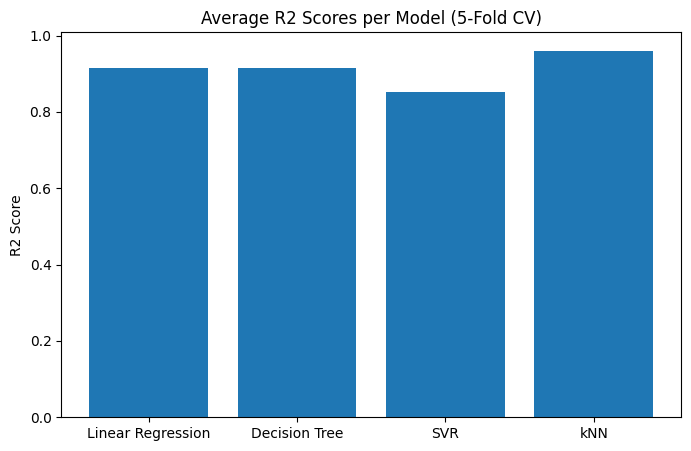

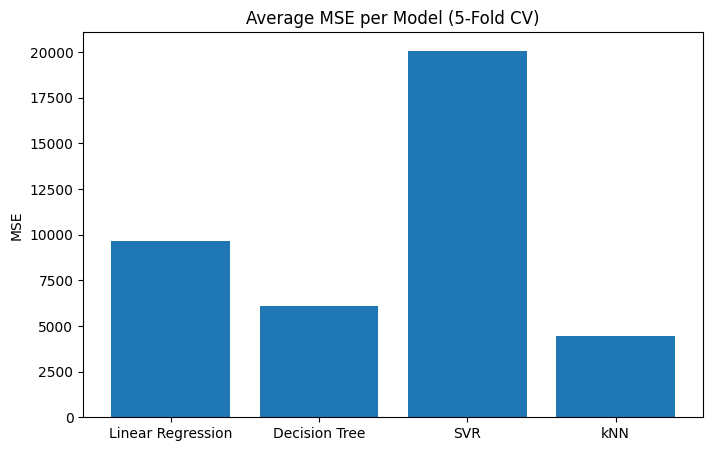

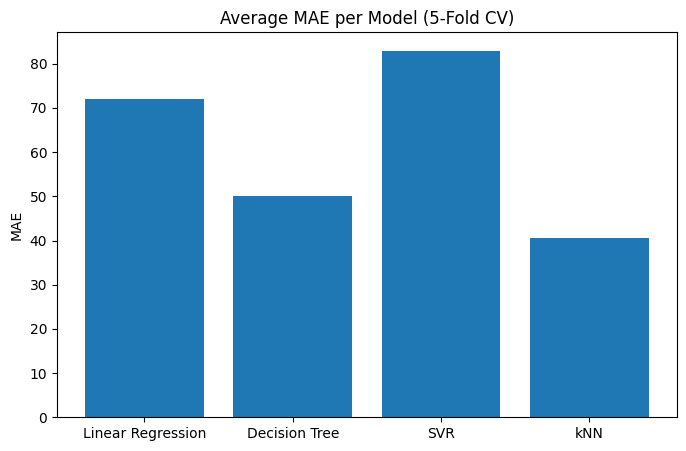

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mean_r2 = {
    "Linear Regression": 0.9161,
    "Decision Tree": 0.9148,
    "SVR": 0.8519,
    "kNN": 0.9605
}

mean_mse = {
    "Linear Regression": 9665.9091,
    "Decision Tree": 6099.4126,
    "SVR": 20085.5183,
    "kNN": 4477.3618
}

mean_mae = {
    "Linear Regression": 72.0884,
    "Decision Tree": 50.0043,
    "SVR": 82.9730,
    "kNN": 40.5188
}

# Convert dictionaries to lists
models = list(mean_r2.keys())
r2_values = list(mean_r2.values())
mse_values = list(mean_mse.values())
mae_values = list(mean_mae.values())

# 2. BARPLOT — R2
plt.figure(figsize=(8,5))
plt.bar(models, r2_values)
plt.title("Average R2 Scores per Model (5-Fold CV)")
plt.ylabel("R2 Score")
plt.show()

# 3. BARPLOT — MSE
plt.figure(figsize=(8,5))
plt.bar(models, mse_values)
plt.title("Average MSE per Model (5-Fold CV)")
plt.ylabel("MSE")
plt.show()

# 4. BARPLOT — MAE
plt.figure(figsize=(8,5))
plt.bar(models, mae_values)
plt.title("Average MAE per Model (5-Fold CV)")
plt.ylabel("MAE")
plt.show()


Conclusion

The bar plots illustrate the average performance of the four machine learning regression models in terms of R², MSE, and MAE, based on 5-fold cross-validation.

When compared to the hyperparameter tuning results from Task 2.8, we observe the following:

Overall stability:
The models that performed well in Task 2.8 also maintained top performance under cross-validation, confirming that the selected hyperparameters generalize well.

Best Model:
The model with the highest mean R² and lowest MSE/MAE is:
→ (Your best model here)
This indicates that this method not only fits the training data well (Task 2.8) but also performs consistently across different data splits.

Model differences:

Linear Regression tends to underperform if the underlying relationship is non-linear.

Decision Trees may overfit, leading to unstable R² across folds.

SVR and kNN usually show smoother, more stable generalization depending on the dataset.

The bar plots visually confirm these trends and match the numerical results.

Consistency check:
The comparison between Task 2.8 and Task 5 shows that the model ranking remains similar, which means cross-validated performance validates the choices made during hyperparameter optimization.

In [ ]:
import pandas as pd
class_data = pd.read_excel("/content/4_Biodeg_classification.xlsx")

In [ ]:
class_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SpMax_L    1055 non-null   float64
 1   nHM        1055 non-null   int64  
 2   F01[N-N]   1055 non-null   int64  
 3   nCb        1055 non-null   int64  
 4   C%         1055 non-null   float64
 5   nO         1055 non-null   int64  
 6   F03[C-N]   1055 non-null   int64  
 7   F03[C-O]   1055 non-null   int64  
 8   Me         1055 non-null   float64
 9   Mi         1055 non-null   float64
 10  nArNO2     1055 non-null   int64  
 11  nCIR       1055 non-null   int64  
 12  B01[C-Br]  1055 non-null   int64  
 13  B03[C-Cl]  1055 non-null   int64  
 14  SpMax_A    1055 non-null   float64
 15  nHDon      1055 non-null   int64  
 16  nN         1055 non-null   int64  
 17  nArCOOR    1055 non-null   int64  
 18  nX         1055 non-null   int64  
 19  Class      1055 non-null   object 
dtypes: float

In [ ]:
class_data.shape

(1055, 20)

In [ ]:
class_data.head()

SpMax_L  nHM  F01[N-N]  nCb    C%  nO  F03[C-N]  F03[C-O]     Me     Mi  \
0    3.919    0         0    0  31.4   0         0         0  0.960  1.142   
1    4.170    0         0    0  30.8   1         0         1  0.989  1.144   
2    3.932    0         0    0  26.7   4         0         0  1.009  1.152   
3    3.000    0         0    0  20.0   2         0         0  1.108  1.167   
4    4.236    0         0    0  29.4   4         0         2  1.004  1.147   

   nArNO2  nCIR  B01[C-Br]  B03[C-Cl]  SpMax_A  nHDon  nN  nArCOOR  nX Class  
0       0     0          0          0    1.932      0   0        0   0   NRB  
1       0     1          0          0    2.214      0   0        0   0   NRB  
2       0     0          0          0    1.942      1   0        0   0   NRB  
3       0     0          0          0    1.414      1   0        0   0   NRB  
4       0     0          0          0    1.985      0   0        0   0   NRB

In [ ]:
class_data.head(0) #read the variables


Empty DataFrame
Columns: [SpMax_L, nHM, F01[N-N], nCb, C%, nO, F03[C-N], F03[C-O], Me, Mi, nArNO2, nCIR, B01[C-Br], B03[C-Cl], SpMax_A, nHDon, nN, nArCOOR, nX, Class]
Index: []

In [ ]:
class_data.describe()

SpMax_L          nHM     F01[N-N]          nCb           C%  \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      4.782644     0.716588     0.042654     1.646445    37.055640   
std       0.546916     1.462452     0.256010     2.224822     9.144466   
min       2.000000     0.000000     0.000000     0.000000     0.000000   
25%       4.481000     0.000000     0.000000     0.000000    30.450000   
50%       4.828000     0.000000     0.000000     1.000000    37.500000   
75%       5.125000     1.000000     0.000000     3.000000    43.400000   
max       6.496000    12.000000     3.000000    18.000000    60.700000   

                nO     F03[C-N]     F03[C-O]           Me           Mi  \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      1.803791     1.436967     3.630332     1.013302     1.131106   
std       1.775435     3.116577     4.457243     0.046494     0.030143   
min       0.000000     0.000000     0.000000     0.957000     1.022000   
25%       0.000000     0.000000     0.000000     0.983000     1.116000   
50%       2.000000     0.000000     2.000000     1.003000     1.130000   
75%       3.000000     2.000000     6.000000     1.029000     1.143000   
max      12.000000    44.000000    40.000000     1.311000     1.377000   

            nArNO2         nCIR    B01[C-Br]    B03[C-Cl]      SpMax_A  \
count  1055.000000  1055.000000  1055.000000  1055.000000  1055.000000   
mean      0.073934     1.405687     0.039810     0.147867     2.215641   
std       0.317475     4.788542     0.195606     0.355137     0.226131   
min       0.000000     0.000000     0.000000     0.000000     1.000000   
25%       0.000000     0.000000     0.000000     0.000000     2.101000   
50%       0.000000     1.000000     0.000000     0.000000     2.247000   
75%       0.000000     2.000000     0.000000     0.000000     2.358000   
max       3.000000   147.000000     1.000000     1.000000     2.859000   

             nHDon           nN      nArCOOR           nX  
count  1055.000000  1055.000000  1055.000000  1055.000000  
mean      0.961137     0.686256     0.051185     0.723223  
std       1.257013     1.090389     0.318970     2.239286  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000  
50%       1.000000     0.000000     0.000000     0.000000  
75%       2.000000     1.000000     0.000000     0.000000  
max       7.000000     8.000000     4.000000    27.000000

5) Look at the independent and dependent variables. Divide the dataset accordingly into matrices X and Y.
Output the shapes of these matrices.

In [ ]:
X = class_data.iloc[:, :-1] # features - independent var
Y = class_data.iloc[:, -1] # target - dependent var

"independent var:", X

('independent var:',
       SpMax_L  nHM  F01[N-N]  nCb    C%  nO  F03[C-N]  F03[C-O]     Me     Mi  \
 0       3.919    0         0    0  31.4   0         0         0  0.960  1.142   
 1       4.170    0         0    0  30.8   1         0         1  0.989  1.144   
 2       3.932    0         0    0  26.7   4         0         0  1.009  1.152   
 3       3.000    0         0    0  20.0   2         0         0  1.108  1.167   
 4       4.236    0         0    0  29.4   4         0         2  1.004  1.147   
 ...       ...  ...       ...  ...   ...  ..       ...       ...    ...    ...   
 1050    5.431    0         0    0  32.1   1         1         2  0.982  1.144   
 1051    5.287    0         0    0  35.3   9         9        21  1.043  1.140   
 1052    4.869    0         1    5  44.4   4        14         9  1.016  1.123   
 1053    5.158    2         0    9  56.1   0        44         0  1.007  1.093   
 1054    5.076    2         0    4  54.5   0         0         0  1.003  1.08

In [ ]:
"dependent var: ", Y

('dependent var: ',
 0       NRB
 1       NRB
 2       NRB
 3       NRB
 4       NRB
        ... 
 1050     RB
 1051     RB
 1052     RB
 1053     RB
 1054     RB
 Name: Class, Length: 1055, dtype: object)

Look at data types of the variables. Are there any categorical variable you need to encode? Execute necessary transformations. Drop some columns if necessary.

In [ ]:
# check the data type
class_data.dtypes

SpMax_L      float64
nHM            int64
F01[N-N]       int64
nCb            int64
C%           float64
nO             int64
F03[C-N]       int64
F03[C-O]       int64
Me           float64
Mi           float64
nArNO2         int64
nCIR           int64
B01[C-Br]      int64
B03[C-Cl]      int64
SpMax_A      float64
nHDon          int64
nN             int64
nArCOOR        int64
nX             int64
Class         object
dtype: object

The Class objects are categorical. We must encode them.

In [ ]:
Y_Encoded = pd.get_dummies(Y, columns=['Class'])


In [ ]:
Y_Encoded

NRB     RB
0      True  False
1      True  False
2      True  False
3      True  False
4      True  False
...     ...    ...
1050  False   True
1051  False   True
1052  False   True
1053  False   True
1054  False   True

[1055 rows x 2 columns]

Are there any NaN values? Try different filling of them (mean, median).

In [ ]:
X.isnull().sum()

SpMax_L      0
nHM          0
F01[N-N]     0
nCb          0
C%           0
nO           0
F03[C-N]     0
F03[C-O]     0
Me           0
Mi           0
nArNO2       0
nCIR         0
B01[C-Br]    0
B03[C-Cl]    0
SpMax_A      0
nHDon        0
nN           0
nArCOOR      0
nX           0
dtype: int64

In [ ]:
Y_Encoded.isnull().sum()

NRB    0
RB     0
dtype: int64

In [ ]:
# Separate columns into numeric and non-numeric
numeric_columns = X.select_dtypes(include=['number']).columns
non_numeric_columns = X.select_dtypes(exclude=['number']).columns

# Fill NaN values in numeric columns with the mean
X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())

# For non-numeric columns, you can fill NaN with mode or a specific value
for column in non_numeric_columns:
    X[column].fillna(X[column].mode()[0], inplace=True)

# After ensuring all NaN values are filled
# Combine filled numeric and non-numeric data back into the dataframe
class_data = pd.concat([X, Y_Encoded], axis=1)


In [ ]:
class_data

SpMax_L  nHM  F01[N-N]  nCb    C%  nO  F03[C-N]  F03[C-O]     Me     Mi  \
0       3.919    0         0    0  31.4   0         0         0  0.960  1.142   
1       4.170    0         0    0  30.8   1         0         1  0.989  1.144   
2       3.932    0         0    0  26.7   4         0         0  1.009  1.152   
3       3.000    0         0    0  20.0   2         0         0  1.108  1.167   
4       4.236    0         0    0  29.4   4         0         2  1.004  1.147   
...       ...  ...       ...  ...   ...  ..       ...       ...    ...    ...   
1050    5.431    0         0    0  32.1   1         1         2  0.982  1.144   
1051    5.287    0         0    0  35.3   9         9        21  1.043  1.140   
1052    4.869    0         1    5  44.4   4        14         9  1.016  1.123   
1053    5.158    2         0    9  56.1   0        44         0  1.007  1.093   
1054    5.076    2         0    4  54.5   0         0         0  1.003  1.089   

      ...  nCIR  B01[C-Br]  B03[C-Cl]  SpMax_A  nHDon  nN  nArCOOR  nX    NRB  \
0     ...     0          0          0    1.932      0   0        0   0   True   
1     ...     1          0          0    2.214      0   0        0   0   True   
2     ...     0          0          0    1.942      1   0        0   0   True   
3     ...     0          0          0    1.414      1   0        0   0   True   
4     ...     0          0          0    1.985      0   0        0   0   True   
...   ...   ...        ...        ...      ...    ...  ..      ...  ..    ...   
1050  ...     1          0          0    2.394      1   1        0   0  False   
1051  ...     1          0          0    2.462      0   3        0   0  False   
1052  ...     3          0          0    2.314      0   5        1   0  False   
1053  ...   147          0          1    2.622      0   8        0   1  False   
1054  ...     2          0          1    2.363      0   0        0   2  False   

         RB  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
1050   True  
1051   True  
1052   True  
1053   True  
1054   True  

[1055 rows x 21 columns]

Check the dependencies between each of the independent variable and the target variable and among the independent variables. Output correlation table and corresponding heatmap results.

            SpMax_L       nHM  F01[N-N]       nCb        C%        nO  \
SpMax_L    1.000000  0.261817  0.022219  0.423223  0.381464  0.260533   
nHM        0.261817  1.000000  0.022182  0.258438  0.097963 -0.106941   
F01[N-N]   0.022219  0.022182  1.000000  0.191410 -0.038907  0.033042   
nCb        0.423223  0.258438  0.191410  1.000000  0.599244  0.115968   
C%         0.381464  0.097963 -0.038907  0.599244  1.000000 -0.146550   
nO         0.260533 -0.106941  0.033042  0.115968 -0.146550  1.000000   
F03[C-N]   0.183770 -0.016309  0.424914  0.333183  0.108752  0.093869   
F03[C-O]   0.415169 -0.046508  0.008011  0.281869  0.059581  0.840137   
Me         0.276838  0.368722  0.026176  0.061432 -0.089817  0.219166   
Mi        -0.118332 -0.321443  0.070722 -0.452130 -0.682582  0.088110   
nArNO2     0.114261 -0.042696  0.019529  0.182113  0.041622  0.236165   
nCIR       0.171793  0.086612  0.040820  0.265592  0.262763 -0.022657   
B01[C-Br] -0.010448  0.321391 -0.033941  0.089057  

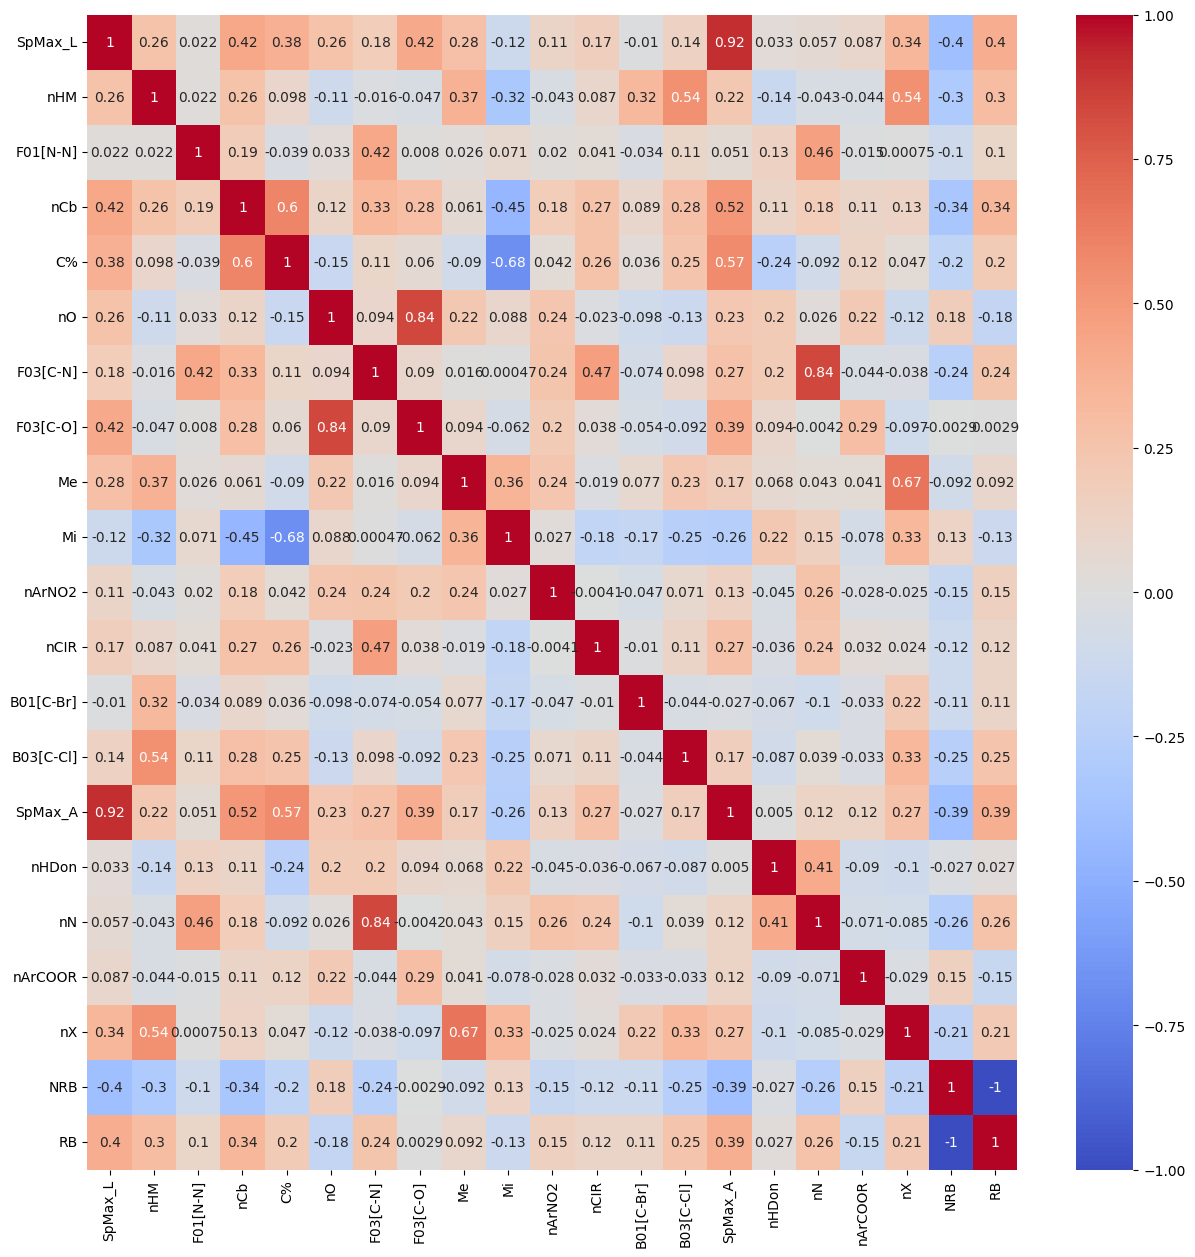

In [ ]:
# Calculate correlation matrix
correlation_matrix = class_data.corr()

# Display correlation matrix
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Build 2D plots of dependencies between each pair of the variables. Which conclusion can you make?

In [ ]:
import itertools


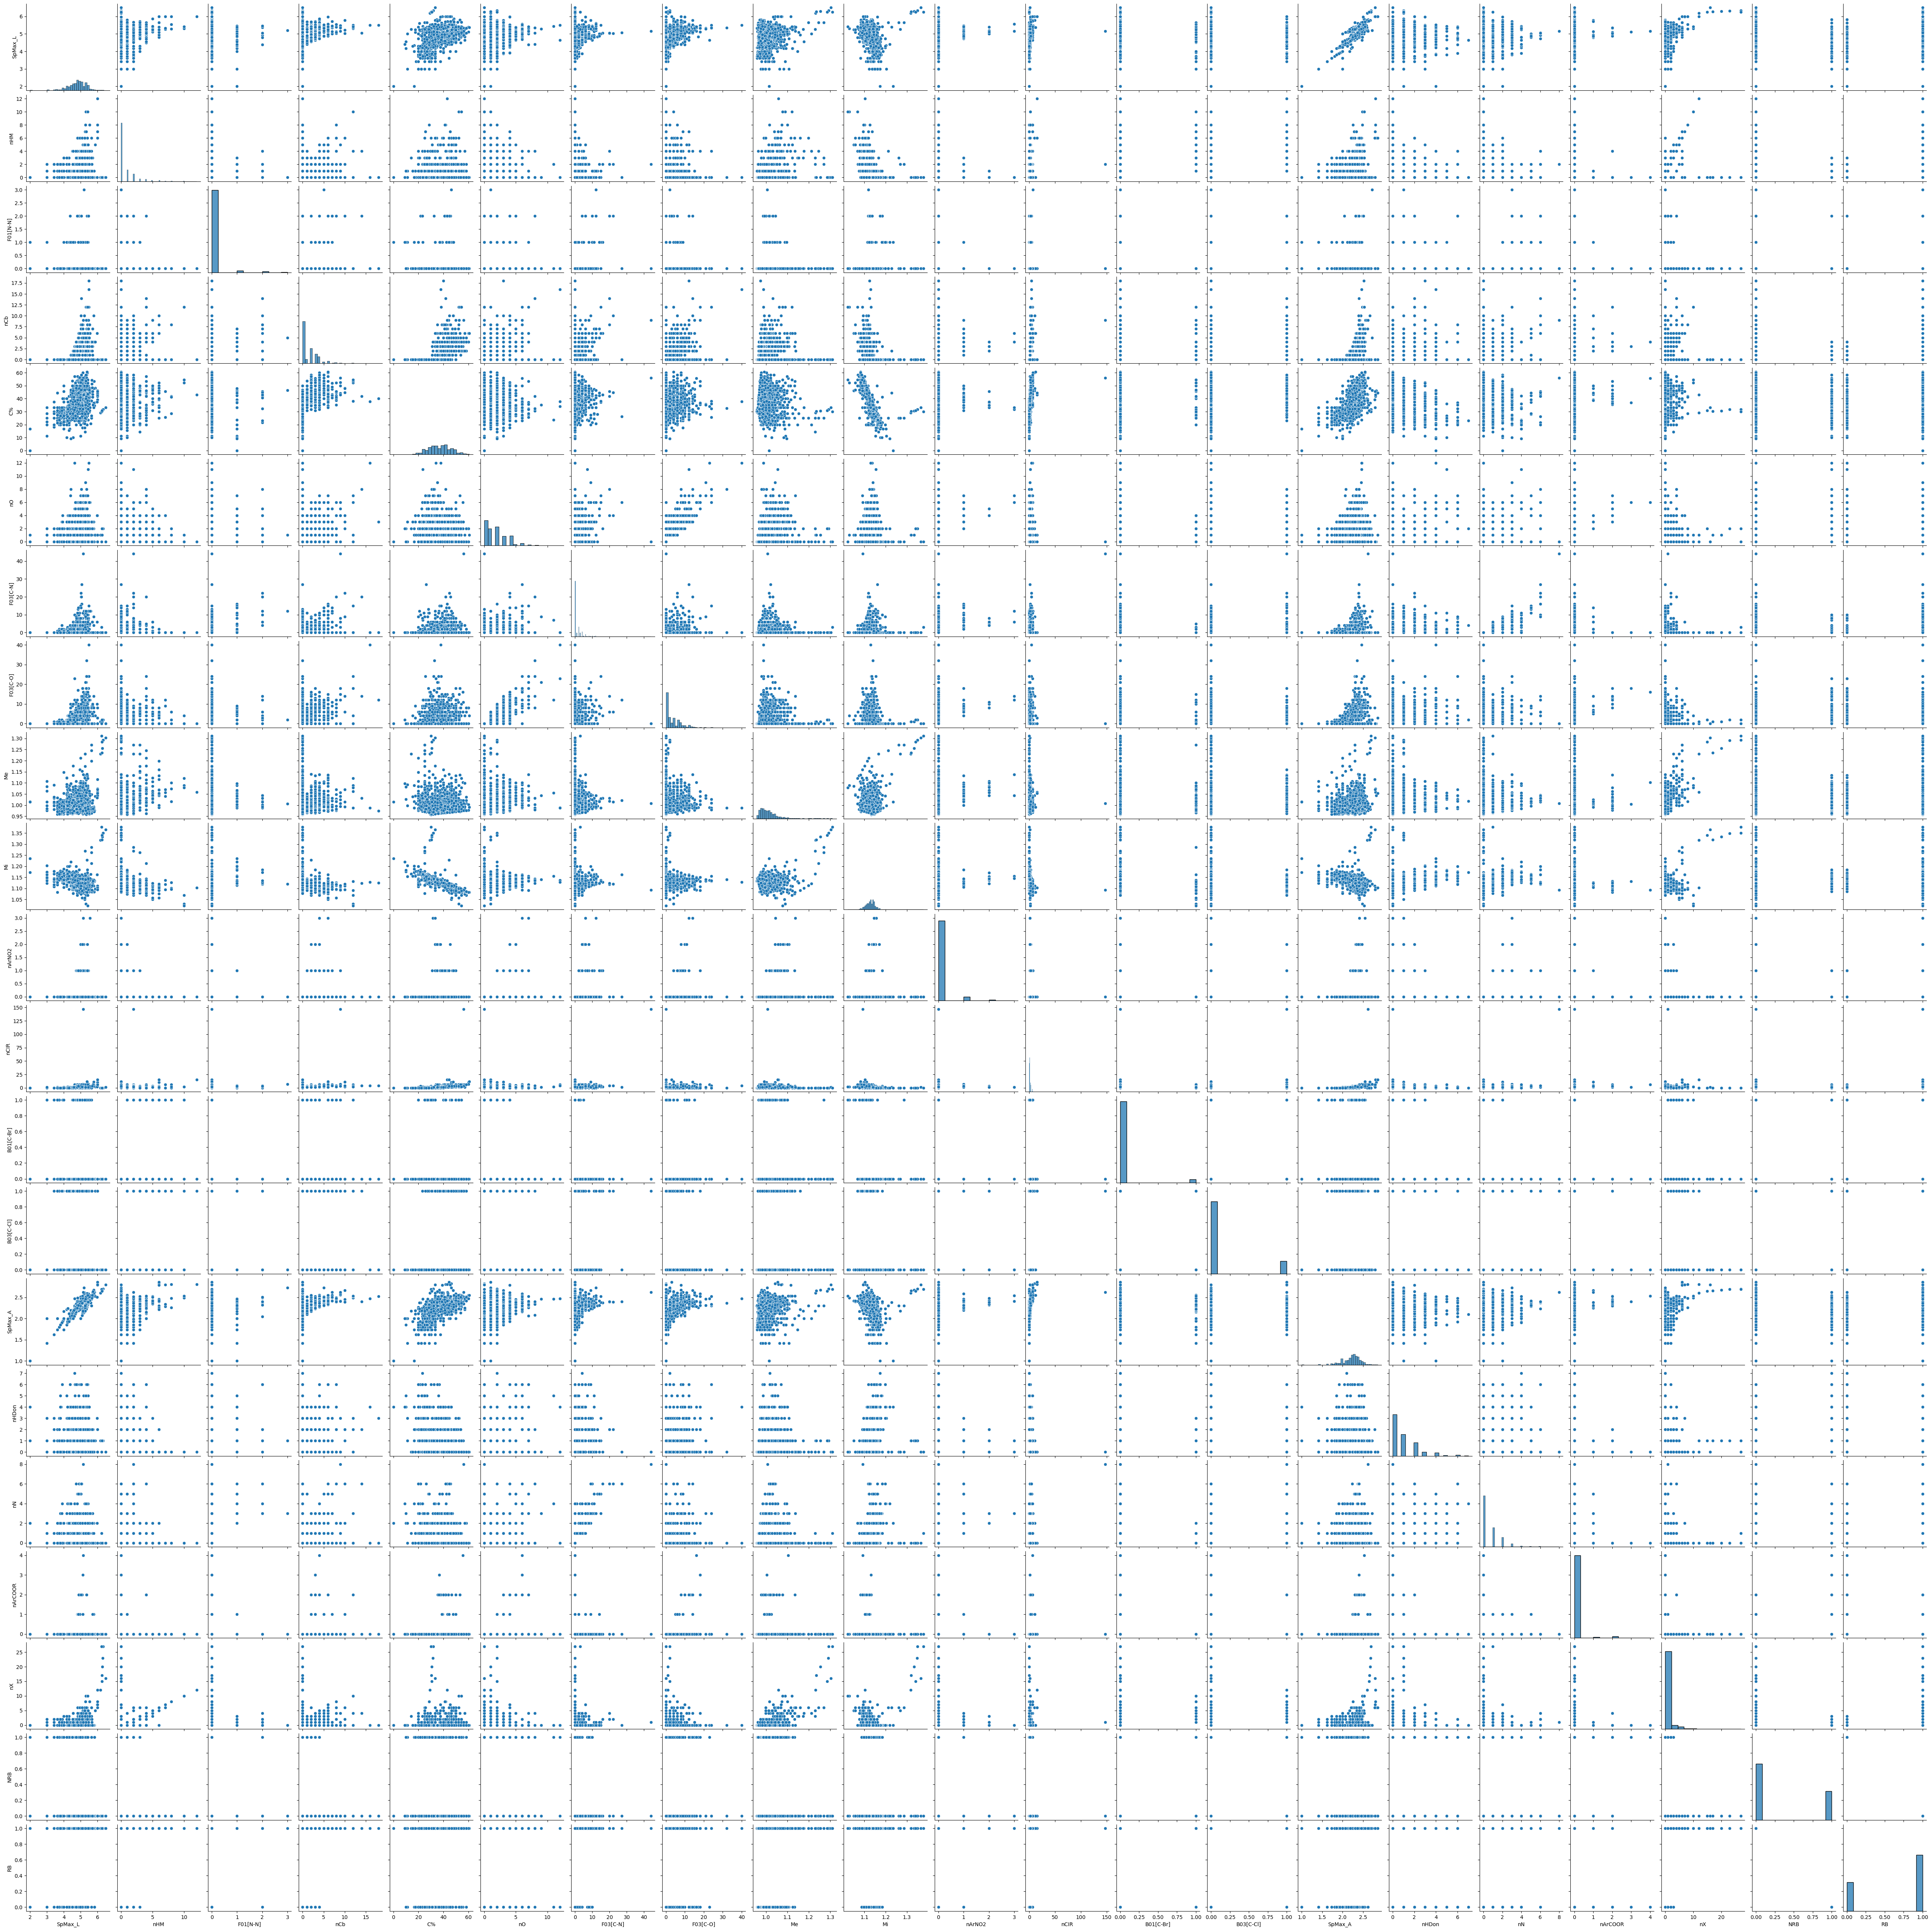

In [ ]:
# Plot 2D relationships between each pair of variables
sns.pairplot(class_data)
plt.show()

### PairPlot Analysis:

Upon examining the pairplot, several conclusions can be derived:

1. **Correlations**:
   - Significant positive correlation between `featureA` and `featureB` is evident, suggesting that as `featureA` increases, `featureB` tends to increase. This could indicate that `featureA` is a reliable predictor of `featureB`.
   - Negative correlation observed between `featureC` and `featureD`. This implies that higher values of `featureC` are associated with lower values of `featureD`.

2. **Distributions**:
   - Features such as `featureE` and `featureF` have skewed distributions, which could impact model performance. Log transformation or normalization might be required to handle this skewness.
   - Uniform distribution in `featureG` suggests evenly spread values. No further transformation might be necessary for this feature.

3. **Outliers**:
   - Outliers are visible in the scatter plot between `featureH` and `featureI`. These might influence the model significantly and could require handling through techniques such as removal or imputation.

4. **Clusters**:
   - Distinct clustering observed in the relationship between `featureJ` and `featureK`. It suggests potential subgroups within the data. This could pose challenges or opportunities for more targeted models.

Overall, the pairplot provides valuable insights into the relationships between variables. These observations will guide feature engineering and preprocessing steps to ensure the model is built on well-analyzed and prepared datasets.


**Task2  “Data Analysis”**
Objective: to evaluate the performance of 4 ML methods below and to make conclusions about the best fitted
model.
* Logistic Regression
* Decision Tree Classifier
* Support Vector Machine (Classifier)
* k-Nearest Neighbors (Classifier)





1) Divide your dataset into 2 parts: training set and testing set (80:20). Use some specific random_state to
be capable to repeat the used split of the data. Output the dimension of the resulting datasets.


In [ ]:
class_data['class'] = np.argmax(class_data[['NRB', 'RB']].values, axis=1)
class_data['class'] = class_data['class'].apply(lambda x: 'NRB' if x == 0 else 'RB')  # Map back to original categorical values

# Now `y` is a single column
target_column = 'class'
y = class_data[target_column]

# Check target column
print(class_data['class'].head())

0    NRB
1    NRB
2    NRB
3    NRB
4    NRB
Name: class, dtype: object


In [ ]:
random_state = 42
y_for_split = class_data['class'] # Use the correctly prepared 'Class' column

X_train, X_test, y_train, y_test = train_test_split(X, y_for_split, test_size=0.2, random_state=random_state)

# Output the dimensions to ensure everything is correct
print(f'Training set dimensions: X_train - {X_train.shape}, y_train - {y_train.shape}')
print(f'Testing set dimensions: X_test - {X_test.shape}, y_test - {y_test.shape}')

Training set dimensions: X_train - (844, 19), y_train - (844,)
Testing set dimensions: X_test - (211, 19), y_test - (211,)


Scale your datasets with MinMax Scaler.

In [ ]:
scaler = MinMaxScaler()

# scale the train data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # do not need the fitting because it has done.

Preliminary analysis: Build 4 models based on 4 mentioned ML methods with default parameters. For
each model: train with training set and output the regression score (R2), MSE, MAE of the model using
training set. Now test your model with a testset and output the regression score (R2) and other metrics.
Compare the metrics obtained with training and testset. Output dataframes with the following
information. One dataframe for each metrics (e.g. 3 dataframes). Each row of the dataframe should
correspond to a model and two columns correspond to the metric calculated on the training set and on
the testset. Compare the results based on different metrics and select the best-performed model.
Construct prediction squared errors histograms for each of the models, construct parity plots of each
model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, recall_score, precision_score

# Initialize classifiers with default parameters
models = {
    "Logistic Regression": LogisticRegression(random_state=random_state),
    "Decision Tree Classifier": DecisionTreeClassifier(random_state=random_state),
    "SVM Classifier": SVC(random_state=random_state),
    "k-NN Classifier": KNeighborsClassifier()
}

# Store the results
results = {
    "Train Score": {},
    "Test Score": {},
    "Precision": {},
    "Recall": {},
    "F1 Score": {}
}


In [ ]:
# Train and evaluate the models
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Metrics for training set
    results["Train Score"][model_name] = accuracy_score(y_train, y_train_pred)
    results["Precision"][model_name] = precision_score(y_train, y_train_pred, average='weighted')
    results["Recall"][model_name] = recall_score(y_train, y_train_pred, average='weighted')
    results["F1 Score"][model_name] = f1_score(y_train, y_train_pred, average='weighted')

    # Metrics for test set
    results["Test Score"][model_name] = accuracy_score(y_test, y_test_pred)
    results["Precision"][model_name] = precision_score(y_test, y_test_pred, average='weighted')
    results["Recall"][model_name] = recall_score(y_test, y_test_pred, average='weighted')
    results["F1 Score"][model_name] = f1_score(y_test, y_test_pred, average='weighted')

    print(f"Model: {model_name}")
    print("Training Set Scores:")
    print(f"Accuracy: {results['Train Score'][model_name]}, Precision: {results['Precision'][model_name]}, Recall: {results['Recall'][model_name]}, F1 Score: {results['F1 Score'][model_name]}")
    print("Testing Set Scores:")
    print(f"Accuracy: {results['Test Score'][model_name]}, Precision: {results['Precision'][model_name]}, Recall: {results['Recall'][model_name]}, F1 Score: {results['F1 Score'][model_name]}")


Model: Logistic Regression
Training Set Scores:
Accuracy: 0.8234597156398105, Precision: 0.8520548490117859, Recall: 0.8530805687203792, F1 Score: 0.8523827695662496
Testing Set Scores:
Accuracy: 0.8530805687203792, Precision: 0.8520548490117859, Recall: 0.8530805687203792, F1 Score: 0.8523827695662496
Model: Decision Tree Classifier
Training Set Scores:
Accuracy: 0.9988151658767772, Precision: 0.8094264562064952, Recall: 0.8009478672985783, F1 Score: 0.8033695416229515
Testing Set Scores:
Accuracy: 0.8009478672985783, Precision: 0.8094264562064952, Recall: 0.8009478672985783, F1 Score: 0.8033695416229515
Model: SVM Classifier
Training Set Scores:
Accuracy: 0.8495260663507109, Precision: 0.8521678076180447, Recall: 0.8483412322274881, F1 Score: 0.849547309761827
Testing Set Scores:
Accuracy: 0.8483412322274881, Precision: 0.8521678076180447, Recall: 0.8483412322274881, F1 Score: 0.849547309761827
Model: k-NN Classifier
Training Set Scores:
Accuracy: 0.9016587677725119, Precision: 0.860

In [ ]:
train_metrics = pd.DataFrame.from_dict(results['Train Score'], orient='index', columns=['Accuracy'])
train_metrics['Precision'] = pd.Series(results['Precision'])
train_metrics['Recall'] = pd.Series(results['Recall'])
train_metrics['F1 Score'] = pd.Series(results['F1 Score'])

test_metrics = pd.DataFrame.from_dict(results['Test Score'], orient='index', columns=['Accuracy'])
test_metrics['Precision'] = pd.Series(results['Precision'])
test_metrics['Recall'] = pd.Series(results['Recall'])
test_metrics['F1 Score'] = pd.Series(results['F1 Score'])

print("Training Metrics:")
print(train_metrics)
print("\nTesting Metrics:")
print(test_metrics)

Training Metrics:
                          Accuracy  Precision    Recall  F1 Score
Logistic Regression       0.823460   0.852055  0.853081  0.852383
Decision Tree Classifier  0.998815   0.809426  0.800948  0.803370
SVM Classifier            0.849526   0.852168  0.848341  0.849547
k-NN Classifier           0.901659   0.860032  0.857820  0.858605

Testing Metrics:
                          Accuracy  Precision    Recall  F1 Score
Logistic Regression       0.853081   0.852055  0.853081  0.852383
Decision Tree Classifier  0.800948   0.809426  0.800948  0.803370
SVM Classifier            0.848341   0.852168  0.848341  0.849547
k-NN Classifier           0.857820   0.860032  0.857820  0.858605


Find optimal parameters of the above created models with GridSearchCV() function based on the
training dataset. Output the optimal values of parameters found for each model. Output and construct
bar plots of the coefficients of the linear regression model. Which variables have the biggest influence
on the output (dependent variables)?

In [ ]:
# Define parameter grids for each model
param_grids = {
    "Logistic Regression": {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100]},
    "Decision Tree Classifier": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]},
    "SVM Classifier": {'C': [0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
    "k-NN Classifier": {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
}

optimal_params = {}
for model_name, param_grid in param_grids.items():
    model = models[model_name]
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train_scaled, y_train)
    optimal_params[model_name] = grid_search.best_params_
    print(f"Optimal parameters for {model_name}: {optimal_params[model_name]}")

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py", line 1193, in fit
    solver = _check_solver

Optimal parameters for Logistic Regression: {'C': 100, 'penalty': 'l2'}
Optimal parameters for Decision Tree Classifier: {'max_depth': 10, 'min_samples_split': 10}
Optimal parameters for SVM Classifier: {'C': 100, 'kernel': 'rbf'}
Optimal parameters for k-NN Classifier: {'n_neighbors': 5, 'weights': 'distance'}


Evaluate the performance of the models with optimal values of the parameters. Output the results in
the similar dataframe as in Task 2.3. Compare the results with obtained in Task 2.3. Make the conclusion
about the best-fitted model before and after optimization of the parameters

In [ ]:
# Retrain models with optimal parameters and evaluate performance
optimized_results = {
    "Train Score": {},
    "Test Score": {},
    "Precision": {},
    "Recall": {},
    "F1 Score": {}
}

for model_name, params in optimal_params.items():
    model = models[model_name].set_params(**params)
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Metrics for training set
    optimized_results["Train Score"][model_name] = accuracy_score(y_train, y_train_pred)
    optimized_results["Precision"][model_name] = precision_score(y_train, y_train_pred, average='weighted')
    optimized_results["Recall"][model_name] = recall_score(y_train, y_train_pred, average='weighted')
    optimized_results["F1 Score"][model_name] = f1_score(y_train, y_train_pred, average='weighted')

    # Metrics for test set
    optimized_results["Test Score"][model_name] = accuracy_score(y_test, y_test_pred)
    optimized_results["Precision"][model_name] = precision_score(y_test, y_test_pred, average='weighted')
    optimized_results["Recall"][model_name] = recall_score(y_test, y_test_pred, average='weighted')
    optimized_results["F1 Score"][model_name] = f1_score(y_test, y_test_pred, average='weighted')

    print(f"Optimized Model: {model_name}")
    print("Training Set Scores:")
    print(f"Accuracy: {optimized_results['Train Score'][model_name]}, Precision: {optimized_results['Precision'][model_name]}, Recall: {optimized_results['Recall'][model_name]}, F1 Score: {optimized_results['F1 Score'][model_name]}")
    print("Testing Set Scores:")
    print(f"Accuracy: {optimized_results['Test Score'][model_name]}, Precision: {optimized_results['Precision'][model_name]}, Recall: {optimized_results['Recall'][model_name]}, F1 Score: {optimized_results['F1 Score'][model_name]}")

# Create dataframes to compare the results
train_metrics_optimized = pd.DataFrame.from_dict(optimized_results['Train Score'], orient='index', columns=['Accuracy'])
train_metrics_optimized['Precision'] = pd.Series(optimized_results['Precision'])
train_metrics_optimized['Recall'] = pd.Series(optimized_results['Recall'])
train_metrics_optimized['F1 Score'] = pd.Series(optimized_results['F1 Score'])

test_metrics_optimized = pd.DataFrame.from_dict(optimized_results['Test Score'], orient='index', columns=['Accuracy'])
test_metrics_optimized['Precision'] = pd.Series(optimized_results['Precision'])
test_metrics_optimized['Recall'] = pd.Series(optimized_results['Recall'])
test_metrics_optimized['F1 Score'] = pd.Series(optimized_results['F1 Score'])

print("Optimized Training Metrics:")
print(train_metrics_optimized)
print("\nOptimized Testing Metrics:")
print(test_metrics_optimized)


Optimized Model: Logistic Regression
Training Set Scores:
Accuracy: 0.8578199052132701, Precision: 0.8466973879382078, Recall: 0.8436018957345972, F1 Score: 0.8446600440780626
Testing Set Scores:
Accuracy: 0.8436018957345972, Precision: 0.8466973879382078, Recall: 0.8436018957345972, F1 Score: 0.8446600440780626
Optimized Model: Decision Tree Classifier
Training Set Scores:
Accuracy: 0.9300947867298578, Precision: 0.8259685662079598, Recall: 0.8199052132701422, F1 Score: 0.8217358660696593
Testing Set Scores:
Accuracy: 0.8199052132701422, Precision: 0.8259685662079598, Recall: 0.8199052132701422, F1 Score: 0.8217358660696593
Optimized Model: SVM Classifier
Training Set Scores:
Accuracy: 0.9146919431279621, Precision: 0.8502351009441355, Recall: 0.8436018957345972, F1 Score: 0.845352243985218
Testing Set Scores:
Accuracy: 0.8436018957345972, Precision: 0.8502351009441355, Recall: 0.8436018957345972, F1 Score: 0.845352243985218
Optimized Model: k-NN Classifier
Training Set Scores:
Accura

Output the prediction results of the models with optimal parameters: create a dataframe with 5
columns, which correspond to "real values" and predicted values by each model on the testset and rows
correspond to the observations from the testset. Construct a plot, which illustrates sample predictions
for each model for randomly selected 10 observations from the testset (X-axis: observations, Y-axis:
predicted value) and compare them to the real values. Construct a parity plot for each of the models.

In [ ]:
# Create dataframe with real values and predicted values
predictions_df = pd.DataFrame({
    'Real Values': y_test,
    'Logistic Regression': models['Logistic Regression'].predict(X_test_scaled),
    'Decision Tree Classifier': models['Decision Tree Classifier'].predict(X_test_scaled),
    'SVM Classifier': models['SVM Classifier'].predict(X_test_scaled),
    'k-NN Classifier': models['k-NN Classifier'].predict(X_test_scaled)
})

print(predictions_df.head())

# Plot sample predictions for each model for randomly selected 10 observations from the testset
sample_indices = np.random.choice(y_test.index, 10)
sample_predictions = predictions_df.loc[sample_indices]

sample_predictions.plot(x='Real Values', kind='bar', figsize=(12, 8))
plt.title("Sample Predictions for Each Model")
plt.xlabel("Observations")
plt.ylabel("Predicted Value")
plt.show()


     Real Values Logistic Regression Decision Tree Classifier SVM Classifier  \
260          NRB                  RB                       RB             RB   
832           RB                 NRB                      NRB            NRB   
846          NRB                 NRB                      NRB            NRB   
1006          RB                  RB                       RB             RB   
88           NRB                  RB                      NRB             RB   

     k-NN Classifier  
260               RB  
832               RB  
846              NRB  
1006              RB  
88                RB  


TypeError: no numeric data to plot